# **SAUDI ARABIA USED CARS - CAR PRICE PREDICTION**

***Created by: Azhar Muhammad Fikri Fuadi***

**Contents:**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation (Data Cleaning, Feature Selection and Feature Engineering)
5. Data Analysis
6. Modeling and Evaluation
7. Conclusion and Recommendation

In [6376]:
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# algorithm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# cross validation & data splitting
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

# preprocessing
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# statistics
from scipy.stats import normaltest

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data manipulation
import pandas as pd
import numpy as np

# saving model
import pickle

# handling warning
import warnings
warnings.filterwarnings("ignore")

## **BUSINESS PROBLEM UNDERSTANDING**

**Context:**

**Syarah.com** merupakan situs web yang secara spesifik menyediakan layanan penjualan mobil bekas yang kantor pusatnya terletak di ibu kota Arab Saudi, Riyadh. Dengan fokus utama pada transaksi antara penjual dan pembeli mobil bekas, situs ini menawarkan pengguna kemudahan dalam menemukan beragam mobil bekas dengan merek, model, dan spesifikasi yang beragam. Selain itu, Syarah.com juga menyajikan informasi terkait harga, kondisi mobil, dan spesifikasi lainnya, dengan tujuan untuk memberikan panduan yang komprehensif bagi pengguna dalam membuat keputusan pembelian yang lebih informatif.

Memahami bagaimana pasar mobil bekas yang berkembang di Arab Saudi serta tren dalam industri otomotif yang menunjukkan kecenderungan pengguna dalam menggunakan *platform* jual-beli secara *online*, seperti Syarah.com, pertumbuhan konsumen yang mengandalkan *platform* tersebut untuk mencari dan menjual mobil bekas telah menciptakan kebutuhan akan pendekatan analitik yang lebih canggih dalam menentukan harga yang kompetitif dan akurat. Dalam konteks ini, tim *data scientist* di Syarah.com diberi tugas untuk merancang dan mengimplementasikan model *machine learning* yang tujuannya adalah memberikan perkiraan harga mobil demi memperlancar transaksi jual-beli mobil bekas melalui *website* Syarah.com secara efisien.

**Problem Statement:**

Berdasarkan konteks yang telah dipaparkan di atas, permasalahan utamanya adalah ketidakpastian dalam menentukan harga yang akurat dan bersaing. Saat ini, kurangnya panduan harga yang transparan dan terstruktur dapat menyulitkan para pengguna dalam menetapkan harga yang tepat untuk mobil bekas mereka. Di samping itu, pasar mobil bekas dipengaruhi oleh perubahan tren dan kondisi ekonomi yang menambah tingkat ketidakpastian dalam menentukan harga mobil. Hal tersebut menciptakan hambatan dalam proses transaksi, di mana penjual mungkin merasa kesulitan menetapkan harga yang pantas, sementara pembeli mungkin tidak yakin dengan keadilan harga yang diajukan.

Dengan adanya permasalahan teresebut, salah satu solusi untuk menanganinya yaitu dengan **mengimplementasikan sistem yang dapat merekomendasikan harga dengan tujuan untuk memberikan kejelasan serta kepastian dalam menentukan harga mobil bekas**. Sistem ini bertujuan agar penjual dapat mendapatkan profit yang sepadan dan pembeli memperoleh mobil sesuai selera dengan harga yang masuk akal. Keberhasilan implementasi sistem ini sangat dibutuhkan agar baik penjual maupun pembeli mempercayai Syarah.com sebagai perusahaan yang mampu menciptakan kondisi pasar yang adil untuk menghindari harga yang terlalu tinggi maupun terlalu rendah, sehingga tidak merugikan baik penjual maupun pembeli. Dengan demikian, hal tersebut dapat meningkatkan kepercayaan dan efisiensi dalam transaksi jual-beli di *website* Syarah.com.

**Goals:**

Merujuk pada permasalahan-permasalah di atas, tujuan utamanya ialah untuk meningkatkan pengalaman bagi pengguna *platform* Syarah.com dengan mengimplementasikan model *machine learning* dalam memprediksi serta mengestimasi harga mobil seakurat mungkin dengan mengacu pada harga pasar. Pengimplementasian akan diproses berdasarkan atribut yang terkandung pada mobil, seperti tahun keluaran, ukuran mesin, fitur-fitur pada mobil, tipe mobil, produsen mobil, jarak tempuh, asal mobil, daerah tempat mobil tersebut ditawarkan, serta jenis transmisi.

Pembuatan model *machine learning* ini diharapkan dapat memastikan penjual dalam memperoleh profit yang sepadan. Di sisi lain, pembeli bisa mendapatkan mobil yang sesuai dengan selera serta harga yang masuk akal, sehingga menciptakan kondisi pasar yang adil dan efisien tanpa risiko *overpricing* maupun *underpricing*.

**Analytic Approach:**

Hal pertama yang musti dilakukan yaitu menganalisis data untuk menemukan pola yang dapat menentukan serta membedakan harga dari mobil bekas, baik itu dari jenis data numerikal maupun kategorikal. Kemudian selanjutnya yaitu membangun suatu model regresi yang dapat membantu perusahaan dalam memberikan estimasi harga jual mobil yang disesuaikan dengan spesifikasi demi memperlancar transaksi jual-beli pada *platform* Syarah.com.

**Metric Evaluation:**

Evaluasi pada model *machine learning* yang dikembangkan akan menggunakan tiga jenis metrik, yaitu ***Root Mean Squared Error* (RMSE)**, ***Mean Absolute Error* (MAE)**, dan ***Mean Absolute Percentage Error* (MAPE)**. **RMSE** akan memberikan wawasan tentang seberapa besar perbedaan rata-rata antara harga yang diprediksi dan harga aktual, dengan menekankan pada akurasi yang lebih besar pada nilai-nilai yang jauh dari nilai aktual. **MAE** akan memberikan nilai rata-rata dari seluruh perbedaan absolut antara harga prediksi dan harga aktual, memberikan pemahaman tentang kesalahan prediksi secara keseluruhan. Sementara itu, **MAPE** akan mengukur kesalahan relatif dalam bentuk persentase dari harga aktual, memberikan gambaran tentang sejauh mana model mampu memberikan prediksi yang relevan secara proporsional. Semakin kecil nilai **RMSE**, **MAE**, dan **MAPE** yang dihasilkan, berarti semakin akurat model tersebut dalam memprediksi harga mobil bekas sesuai dengan limitasi fitur yang digunakan. Dengan menggabungkan ketiga metrik tersebut, evaluasi pada model ini diharapkan dapat memberikan pandangan yang komprehensif terkait kemampuan model dalam memberikan prediksi harga yang akurat untuk meningkatkan kepercayaan dan efisiensi dalam transaksi jual-beli mobil bekas di *platform* Syarah.com.

## **DATA UNDERSTANDING**

Sebelum masuk ke dalam tahap *data preparation*, kita perlu mengenali *dataset*-nya terlebih dahulu pada tahapan *data understanding*. Dari proses ini, kita akan mencoba untuk memahami informasi apa saja yang terkandung di dalamnya. Sumber dari *dataset* tersebut dapat diakses pada tautan [ini](https://drive.google.com/drive/folders/123QthHe9ECfB1qUFCfDinHibrNhsnZKQ).

In [6377]:
# menampilkan isi dari dataset
df = pd.read_csv("data_saudi_used_cars.csv")
display(df.head(), df.tail())

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000
5623,ES,Jeddah,Lexus,Automatic,Other,Full,2017,3.5,115000,True,0


In [6378]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Secara garis besar, *dataset* di atas berisi arsip mobil bekas yang dikumpulkan dari *website* Syarah.com. Dalam *dataset* tersebut, setiap baris mewakili satu mobil bekas (5.624 baris), serta terdapat 11 kolom. Deskripsi terkait kolom-kolom yang ada pada dataset di atas dapat dilihat pada tabel berikut:

| Attribute | Data Type | Description |
| --- | --- | --- |
| Type | Object | Type of used car. |
| Region | Object | The region in which the used car was offered for sale. |
| Make | Object | The company name. |
| Gear_Type | Object | Gear type size of used car. |
| Origin | Object | Origin of used car. |
| Options | Object | Options of used car. |
| Year | Integer | Manufacturing year. |
| Engine_Size | Float | The engine size of used car. |
| Mileage | Integer | Mileage of used car. |
| Negotiable | Boolean | True if the price is 0, that means it is negotiable. |
| Price | Integer | Used car price. |

Catatan:
- Kolom kategorikal: `Type, Region, Make, Gear_Type, Origin, Options,` dan `Negotiable`.
- Kolom numerikal: `Year, Engine_Size, Mileage,` dan `Price`.

In [6379]:
# menampilkan unique values dari setiap kolom
pd.set_option("display.max_colwidth", 1)

list_item = []
for col in df.columns:
    list_item.append([col, df[col].nunique(), df[col].unique()])

tabel_unique = pd.DataFrame(columns = ["Column Name", "Number of Unique", "Unique Sample"], data = list_item)
tabel_unique

,Column Name,Number of Unique,Unique Sample
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,"[True, False]"


In [6380]:
# menampilkan deskripsi dari data numerikal dan kategorikal
display(df.describe(include = ["object", "bool"]), df.describe())

,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2272,1431,4875,4188,2233,3828


,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


*Output* pertama menampilkan *unique values* beserta jumlah dari setiap nilai unik di setiap kolomnya, sedangkan *output* kedua menampilkan *descriptive statistics* yang menggambarkan secara komprehensif terkait *dataset* tanpa melakukan pengujian hipotesis. Proses ini membantu kita dalam menyajikan data dengan jelas dan membuat kesimpulan awal tentang karakteristik data yang diamati, baik itu data yang terdapat pada kolom kategorikal maupun numerikal. Dari kedua informasi di atas, kita dapat menarik kesimpulan bahwa:
- Semua kolom kategorikal berisi data dengan nominal kategorinya yang bervariasi:
    - `Type`: Memiliki nilai unik sebanyak 347 dengan kategori yang paling sering muncul (modus) yaitu **Land Cruiser** sebanyak 269 kali.
    - `Region`: Memiliki nilai unik sebanyak 27 dengan kategori yang paling sering muncul (modus) yaitu **Riyadh** sebanyak 2.272 kali.
    - `Make`: Memiliki nilai unik sebanyak 58 dengan kategori yang paling sering muncul (modus) yaitu **Toyota** sebanyak 1.431 kali.
    - `Gear_Type`: Memiliki nilai unik sebanyak 2 yang berisi **Manual** dan **Automatic**, dengan kategori yang paling sering muncul (modus) yaitu **Automatic** sebanyak 4.875 kali.
    - `Origin`: Memiliki nilai unik sebanyak 4 yang berisi **Saudi**, **Gulf Arabic**, **Other**, dan **Unknown**, dengan kategori yang paling sering muncul (modus) yaitu **Saudi** sebanyak 4.188 kali.
    - `Options`: Memiliki nilai unik sebanyak 3 yang berisi **Standard**, **Full**, dan **Semi Full**, dengan kategori yang paling sering muncul (modus) yaitu **Full** sebanyak 2.233 kali.
    - `Negotiable`: Memiliki nilai unik sebanyak 2 yang berisi **True** dan **False**, dengan kategori yang paling sering muncul (modus) yaitu **False** (tidak bisa nego) sebanyak 3.828 kali.
- `Year` berisi data numerikal diskrit yang nilainya bervariasi, yaitu berada di antara tahun 1963 hingga tahun 2022.
- `Engine_Size` berisi data numerikal kontinu yang nilainya bervariasi, yaitu berada di antara 1.000 cc hingga 9.000 cc (asumsi standar setiap produsen sama, di mana 1 = 1.000 cc, 2 = 2.000 cc, 3 = 3.000 cc, dst.).
- `Mileage` berisi data numerikal kontinu yang nilainya bervariasi, yaitu berada di antara 100 km hingga 20.000.000 km, dengan nilai rata-ratanya sebesar **150.923** km.
- `Price` berisi data numerikal kontinu yang nilainya bervariasi, yaitu berada di antara 0 SAR hingga 850.000 SAR, dengan nilai rata-ratanya sebesar **53.074** SAR.

## **EXPLORATORY DATA ANALYSIS**

In [6381]:
# memisahkan kolom kategorikal dan numerikal
categorical_columns = df.describe(include = ["object", "bool"]).columns
numerical_columns = df.describe().columns

### `Categorical Columns`

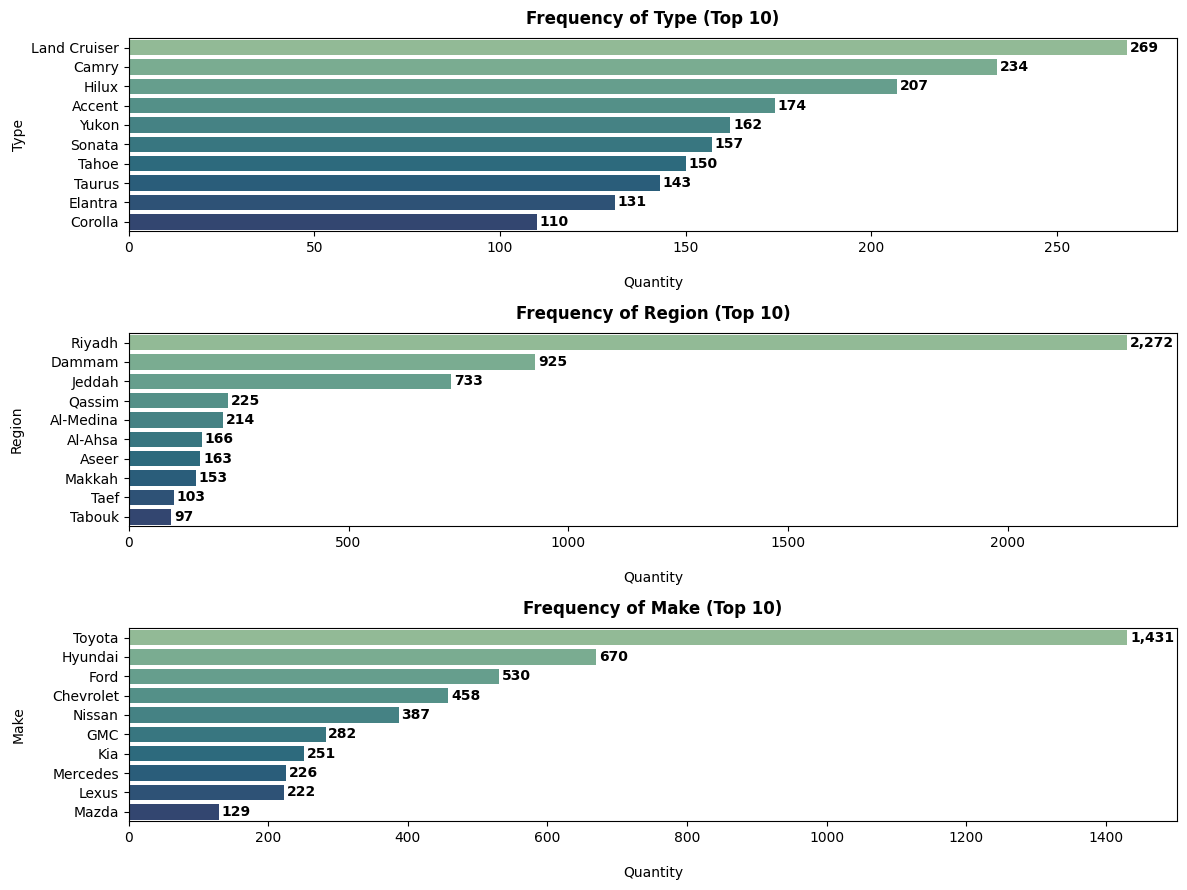

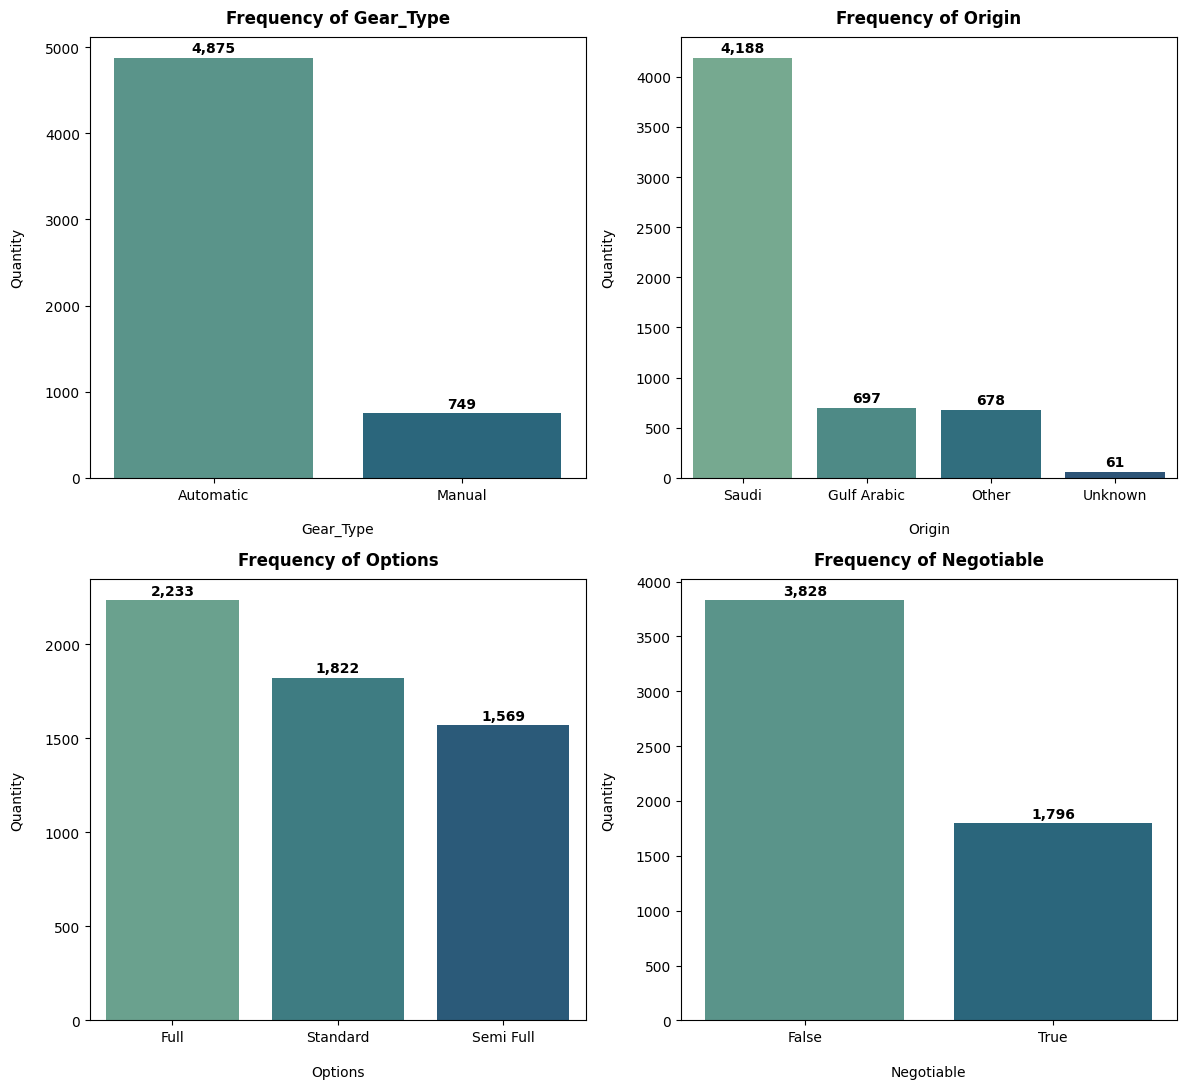

In [6382]:
# membuat countplot untuk setiap kolom kategorikal    
for plot in range(2):
    if plot == 0:
        fig, ax = plt.subplots(3, 1, figsize = (12, 9))
        for i, j in zip(categorical_columns[:3], ax.flatten()):
            ax = sns.countplot(data = df, y = i, ax = j, order = df[i].value_counts().index[0:10], palette = "crest")
            ax.set_title(f"Frequency of {i} (Top 10)", fontsize = 12, pad = 10, fontweight = "bold")
            ax.set_xlabel("Quantity", labelpad = 15)
            if i != "Type":
                ax.set_ylabel(i, labelpad = 18.8) 
            container = ax.containers[0]
            ax.bar_label(
                container,
                labels = [f"{x:,.0f}" for x in container.datavalues],
                label_type = "edge",
                padding = 2,
                color = "black",
                fontweight = "bold"
            )
        plt.tight_layout()
        plt.show()
    else:
        fig, ax = plt.subplots(2, 2, figsize = (11.97, 11))
        for i, j in zip(categorical_columns[3:], ax.flatten()):
            ax = sns.countplot(data = df, x = i, ax = j, order = df[i].value_counts().index, palette = "crest")
            ax.set_title(f"Frequency of {i}", fontsize = 12, pad = 10, fontweight = "bold")
            ax.set_xlabel(i, labelpad = 15)
            ax.set_ylabel("Quantity", labelpad = 15)
            container = ax.containers[0]
            ax.bar_label(
                container,
                labels = [f"{x:,.0f}" for x in container.datavalues],
                label_type = "edge",
                padding = 2,
                color = "black",
                fontweight = "bold"
            )
        plt.tight_layout()
        plt.show()

Merujuk pada penjelasan terkait *descriptive statistics*, dari visualisasi untuk setiap kolom kategorikal di atas, kita dapat membuktikan bahwasanya:
- **Land Cruiser** merupakan `Type` mobil yang paling banyak dipasarkan.
- **Riyadh** menjadi `Region` yang paling banyak memasarkan mobil. Hal tersebut 'mungkin' di karenakan **Riyadh** adalah kota di mana kantor pusat Syarah.com didirikan, sehingga orang-orang di sekitarnya lebih mengetahui keberadaan *platform* jual-beli mobil Syarah.com jika di bandingkan dengan orang-orang di kota lain. Atau 'mungkin' memang pasar jual-beli mobil di Saudi Arabia lebih ramai di kota **Riyadh**.
- **Toyota** menjadi `Make` atau *brand* mobil yang paling banyak dipasarkan di *website* Syarah.com. Hal tersebut bisa didukung dengan grafik `Type`, di mana *top* 3 dari mobil yang paling banyak dijual merupakan buatan *brand* **Toyota** dengan jumlahnya ± 49,62% dari keseluruhan mobil **Toyota** yang dipasarkan.
- Mobil dengan transmisi **Automatic** lebih banyak dijual dibandingkan dengan transmisi **Manual**.
- Mobil yang berasal dari **Saudi** atau Saudi Arabia merupakan mobil yang paling banyak dijual. Hal itu sangatlah masuk akal lantaran *platform* Syarah.com ini berasal dari Saudi Arabia itu sendiri.
- Fitur atau `Options` pada mobil memiliki `Options` **Full**, yang artinya mayoritas mobil yang dijual dilengkapi dengan semua fitur dan opsi yang tersedia pada mobil itu sendiri.
- Mayoritas mobil yang dijual tidak bisa dinego atau ditawar.

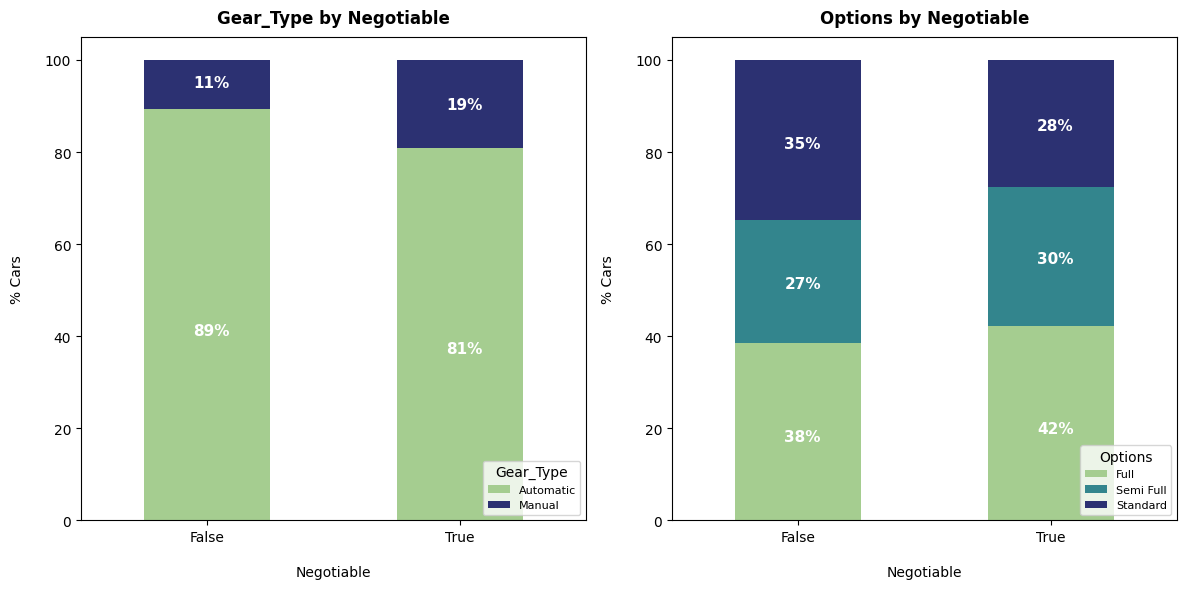

In [6383]:
# membuat stacked bar chart untuk melihat proporsi Negotiable terhadap Gear_Type dan Options
plt.figure(figsize = (11.97, 6))
plotnumber = 1

for feature in ["Gear_Type", "Options"]:
    groupby_table = df.groupby(["Negotiable", feature]).size().unstack()
    def show():
        if height > 0:
            return "{:.0f}%".format(height)
        else:
            return ""
    
    ax = plt.subplot(1, 2, plotnumber)
    (groupby_table.T * 100.0 / groupby_table.T.sum()).T.plot(
        kind = "bar",
        width = 0.5,
        stacked = True,
        rot = 0,
        ax = ax,
        colormap = "crest"
    )

    ax.legend(loc = "lower right", prop = {"size" : 8}, title = feature)
    ax.set_title(f"{feature} by {'Negotiable'}", fontsize = 12, pad = 10, fontweight = "bold")
    ax.set_xlabel("Negotiable", labelpad = 15)
    ax.set_ylabel("% Cars", labelpad = 15)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(
            show(),
            (p.get_x() + 0.39 * width, p.get_y() + .45 * height),
            color = "white",
            weight = "bold",
            size = 11
        )
    plt.tight_layout()
    plotnumber += 1

Dari grafik di atas, kita dapat menyimpulkan bahwa:
- Baik mobil yang bisa dinego atau tidak, keduanya memiliki proporsi mobil dengan `Gear_Type` **Automatic** yang sama-sama lebih besar dibandingkan dengan **Manual**, yaitu di atas 80%.
- Begitupun juga dengan `Options` **Full** yang sama-sama memiliki proporsi lebih besar dibandingkan **Semi Full** serta **Standard**, baik itu pada mobil yang bisa dinego ataupun yang tidak.

### `Numerical Columns`

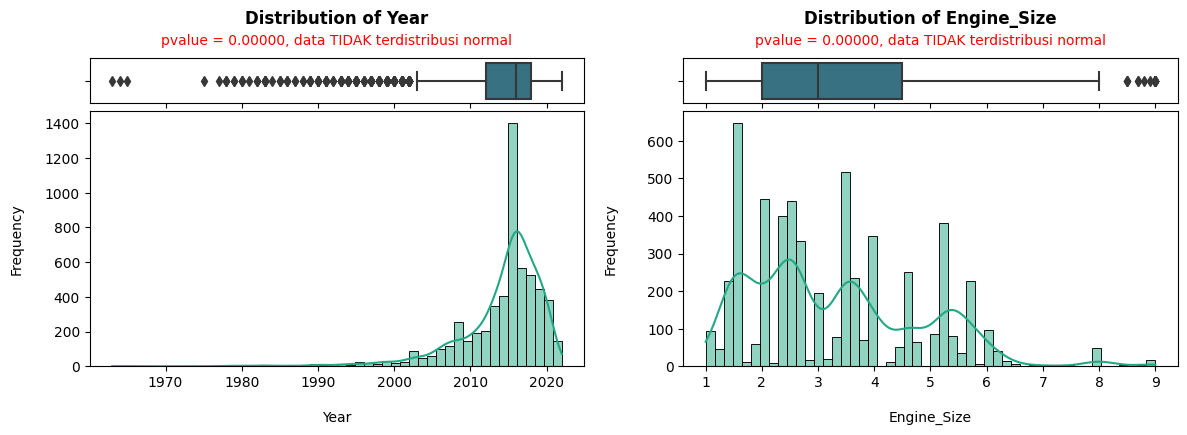

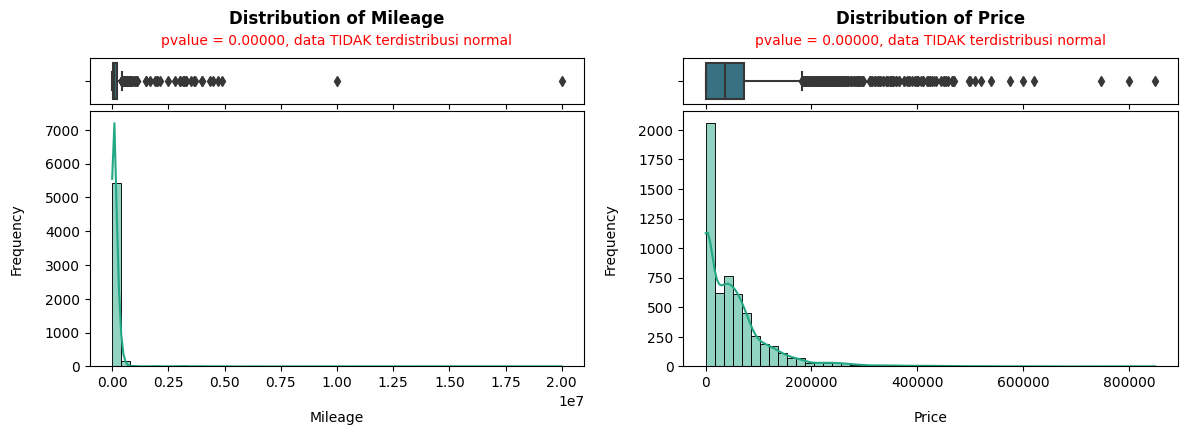

In [6384]:
# menampilkan distribusi data pada kolom numerikal beserta uji normalitasnya
content = [numerical_columns[:2], numerical_columns[2:]]
for plot in content:    
    fig, ax = plt.subplots(
        2,
        2,
        figsize = (14.04, 4),
        gridspec_kw = {
            "height_ratios": (.15, .85),
            "hspace": 0.05
        }
    )

    ax = ax.flatten()
    for i, kolom in enumerate(plot):
        stat, pvalue = normaltest(df[kolom].dropna())
        if pvalue > 0.05:
            distribution = f"pvalue = {pvalue:.5f}, data terdistribusi normal"
            color = "green"
        else:
            distribution = f"pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal"
            color = "red"

        sns.boxplot(x = df[kolom], ax = ax[i], color = "#2a788e")
        ax[i].set_title(f"Distribution of {kolom}\n", fontsize = 12, pad = 10, fontweight = "bold")
        ax[i].text(0.5, 1.3, distribution, color = color, ha = "center", transform = ax[i].transAxes)
        sns.histplot(data = df[kolom], ax = ax[i+2], kde = True, bins = 50, color = "#22a884")
        ax[i + 2].set_xlabel(kolom, labelpad = 15)
        if kolom == "Engine_Size":
            ax[i + 2].set_ylabel(f"Frequency", labelpad = 21)
        else:
            ax[i + 2].set_ylabel(f"Frequency", labelpad = 15)
    plt.tight_layout()
    plt.show()

Berdasarkan *output* di atas, semua kolom numerikal memiliki distribusi data yang tidak normal. Terlihat sangat jelas bahwa kolom `Year` memiliki distribusi *right-skewed* atau *positive skew*, sedangkan untuk kolom `Engine_Size, Mileage,` dan `Price` memiliki distribusi *left-skewed* atau *negative skew*. Hal itu dapat dibuktikan juga dengan uji normalitas pada keempat kolom tersebut, di mana semua nilai **pvalue**-nya yang berada di bawah 0,05. Selain itu, kita dapat mengetahui bahwa semua kolom numerikal memiliki cukup banyak *outlier*, yang mana hal tersebut perlu kita tangani nanti saat tahapan *data preparation*.

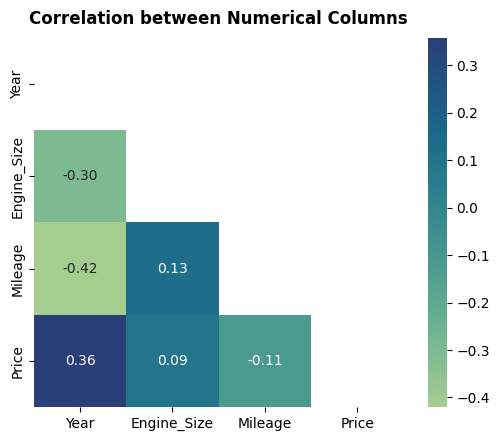

In [6385]:
# mengecek korelasi setiap kolom numerikal
numerical_correlation = df[numerical_columns].corr(method = "spearman")
matrix = np.triu(numerical_correlation)
sns.heatmap(
    data = numerical_correlation,
    annot = True,
    fmt = ".2f",
    cmap = "crest",   
    center = 0,
    mask = matrix,
    square = True
)
plt.title("Correlation between Numerical Columns", fontsize = 12, pad = 10, fontweight = "bold")
plt.show()

Dari grafik *heatmap* di atas, kita bisa mengetahui bahwa:
- `Year` memiliki hubungan *positive-moderate* terhadap `Price` dengan nilai 0.36. Artinya, semakin baru tahun keluaran mobil, maka akan semakin tinggi pula harga mobil tersebut.
- `Year` memiliki hubungan *negative-moderate* terhadap `Mileage` dengan nilai -0.42. Artinya, semakin baru tahun keluaran mobil, maka jarak tempuh dari mobil tersebut akan semakin rendah.
- `Year` memiliki hubungan *negative-moderate* terhadap `Engine_Size` dengan nilai -0.30. Artinya, semakin baru tahun keluaran mobil, maka kapasitas mesinnya akan semakin kecil.
- Korelasi antara `Engine_Size` dengan `Price`, kemudian `Engine_Size` dengan `Mileage`, serta `Mileage` dengan `Price` memiliki hubungan yang sangat lemah.

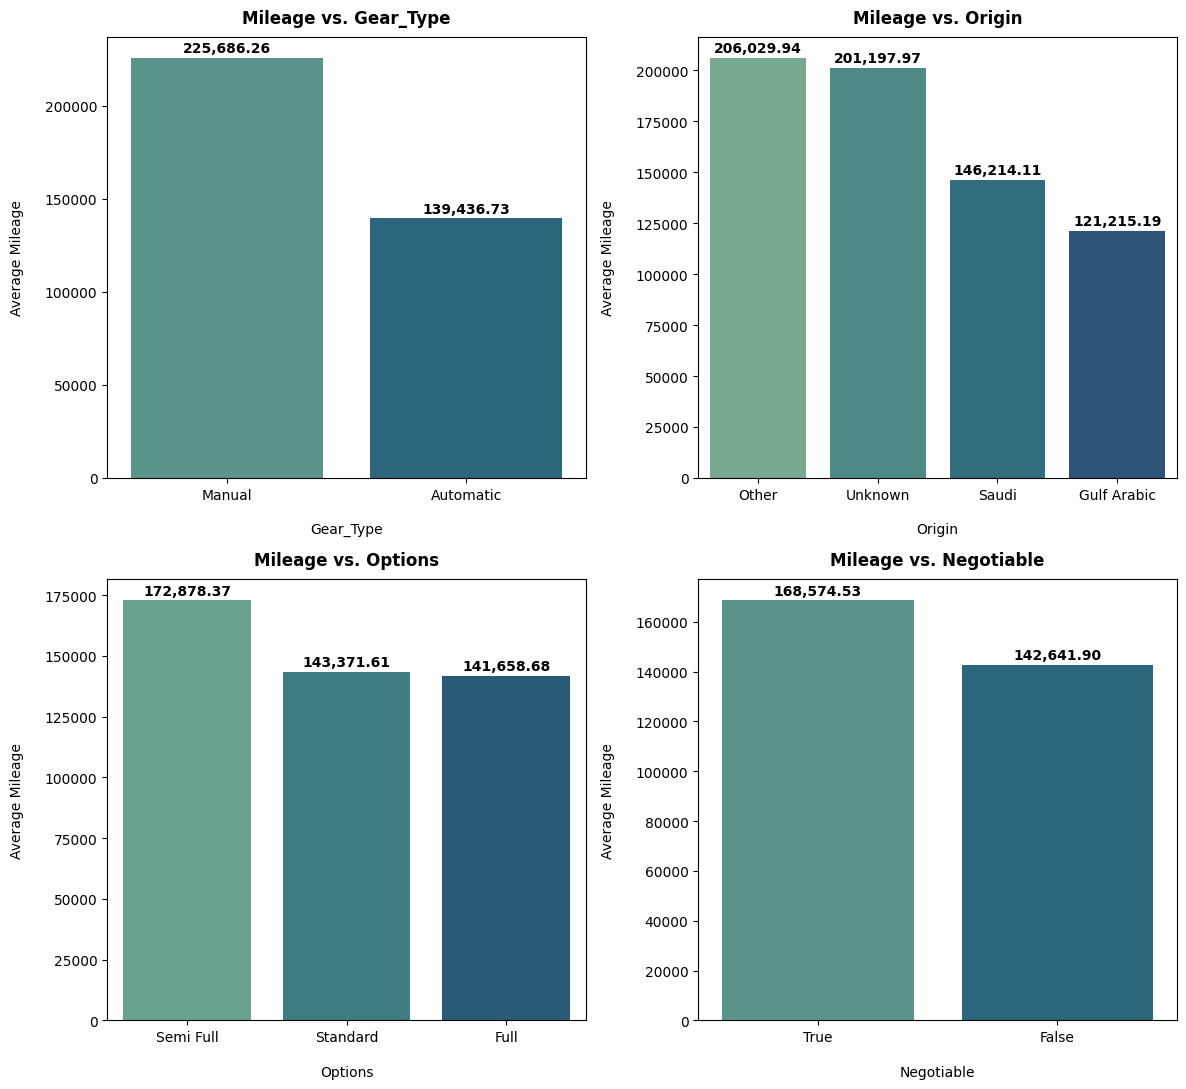

In [6386]:
# menampilkan rata-rata Mileage terhadap kolom Gear_Type, Origin, Options, dan Negotiable
fig, axes = plt.subplots(2, 2, figsize = (11.97, 11))
for i, j in zip(categorical_columns[3:], axes.flatten()):
    ax = sns.barplot(data = df, x = i, y = "Mileage", ax = j, ci = 0, estimator = "mean", order = df.groupby(i)["Mileage"].mean().sort_values(ascending = False).index, palette = "crest")
    ax.set_title(f"Mileage vs. {i}", fontsize = 12, pad = 10, fontweight = "bold")
    ax.set_xlabel(i, labelpad = 15)
    ax.set_ylabel("Average Mileage", labelpad = 15)
    container = ax.containers[0]
    ax.bar_label(
        container,
        labels = [f"{x:,.2f}" for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold"
    )
plt.tight_layout()
plt.show()

Dari grafik di atas kita dapat mengetahui bahwa :
- Rata-rata `Mileage` untuk mobil yang memiliki `Gear_Type` **Manual** cenderung lebih tinggi dibandingkan dengan mobil yang memiliki `Gear_Type` **Automatic**. Kita dapat berasumsi bahwa mobil dengan transmisi **Manual** lebih nyaman dipakai untuk bepergian jarak jauh daripada mobil yang bertransmisi **Automatic**, sehingga wajar saja jika mobil **Manual** memiliki rata-rata jarak tempuh yang tinggi.
- Rata-rata `Mileage` untuk mobil yang berasal dari `Origin` selain **Saudi** dan **Gulf Arabic** cenderung lebih tinggi.
- Rata-rata `Mileage` untuk mobil yang memiliki `Options` atau fitur **Semi Full** cenderung lebih tinggi jika dibandingkan dengan mobil yang memiliki fitur **Standard** dan **Full**.
- Rata-rata `Mileage` untuk mobil yang bisa dinego cenderung lebih tinggi daripada mobil yang tidak bisa dinego.

## **DATA PREPARATION (Data Cleaning, Feature Selection and Feature Engineering)**

Tahap ini bertujuan untuk mengidentifikasi dan mengoreksi atau membuang data anomali dari *dataset*. Data yang diperbaiki atau dibersihkan bisa berupa data yang inkonsisten, tidak akurat, duplikat, salah format, atau hal-hal lain yang dapat mengganggu proses analisis, seperti kolom-kolom yang tidak akan dianalisa. Dalam tahap ini, setiap penanganan anomali yang dilakukan akan disertai dengan justifikasi langkah yang diambil.

In [6387]:
# mengcopy dataframe terlebih dahulu agar tidak mengubah dataframe aslinya
df_model = df.copy()

### `Drop Irrelevant Features`

Kolom `Negotiable` dirasa tidak relevan untuk dimasukkan ke dalam *features* saat pembuatan model *machine learning*. Isi dari kolom tersebut yaitu keterangan mobil bekas yang dapat dinego dan tidak dapat dinego (**True** dan **False**). Melihat fokus utama kita adalah memprediksi harga mobil bekas, kita tidak peduli jikalau mobil tersebut bisa dinego atau tidak, sehingga kita perlu menghilangkan kolom tersebut dari dataset.

In [6388]:
# mengecek jumlah kolom
df_model.info()
print(f"\nJumlah kolom sebelum menghapus fitur yang tidak dibutuhkan: {df_model.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB

Jumlah kolom sebelum menghapus fitur yang tidak dibutuhkan: 11


In [6389]:
# menghapus kolom Negotiable
df_model = df_model.drop(columns = ["Negotiable"])
df_model.info()
print(f"\nJumlah kolom setelah menghapus fitur yang tidak dibutuhkan: {df_model.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Price        5624 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 439.5+ KB

Jumlah kolom setelah menghapus fitur yang tidak dibutuhkan: 10


### `Check Missing Values`

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Price          0
dtype: int64


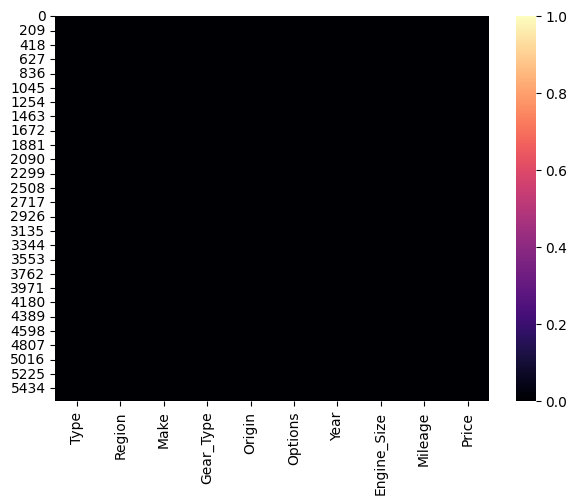

In [6390]:
# menampilkan missing value
print(df_model.isna().sum())
plt.figure(figsize = (7, 5))
sns.heatmap(data = df_model.isna(), vmin = 0, vmax = 1, cmap = "magma")
plt.show()

Secara garis besar, *dataset* ini tidak memiliki *missing values* di setiap kolomnya, sehingga tidak perlu dilakukan penanganan *missing values* terhadap *dataset*. Hal tersebut dapat terlihat sangat jelas ketika menampilkan *output* pertama yang menunjukkan angka 0 (nol) di setiap kolomnya, serta pada *output* kedua (*heatmap*) yang secara keseluruhan terlihat hitam di setiap baris dan kolomnya serta tidak terdapat garis putih yang menandakan adanya *missing values*.

### `Remove Duplicated Values`

In [6391]:
# menampilkan data duplikat
display(df_model[df_model.duplicated()])
print(f"Jumlah data duplikat: {df_model.duplicated().sum()}")
print(f"Jumlah keseluruhan data sebelum menghapus data duplikat: {len(df_model)}")

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,0


Jumlah data duplikat: 4
Jumlah keseluruhan data sebelum menghapus data duplikat: 5624


Setelah dilakukan pengecekan, ternyata *dataset* tersebut mengandung data duplikat sebanyak 4 data, sehingga kita perlu melakukan penanganan terhadap data duplikat yang ada.

In [6392]:
# menghapus data duplikat
df_model = df_model.drop_duplicates()
display(df_model[df_model.duplicated()])
if df_model.duplicated().sum() == 0:
    print(f"Data duplikat berhasil dihapus.")
    print(f"Jumlah keseluruhan data setelah menghapus data duplikat: {len(df_model)}")
else:
    print(f"Data duplikat BELUM berhasil dihapus.")

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price


Data duplikat berhasil dihapus.
Jumlah keseluruhan data setelah menghapus data duplikat: 5620


### `Remove '0' (zero) Price`

Kolom `Price` merupakan target yang akan kita prediksi *values*-nya, sehingga tidak boleh ada data yang bernilai 0 (nol). Berdasarkan *domain knowledge* pun sangat tidak masuk akal jika ada harga mobil yang dijual seharga 0 SAR, meskipun kita mengetahui bahwa nilai 0 menandakan mobil tersebut dapat dinego atau ditawar, akan tetapi kita perlu menghapus data tersebut demi kelancaran proses pembuatan model untuk memprediksi harganya.

In [6393]:
# mengecek data yang memiliki Price = 0
print(f"Jumlah data yang memiliki harga = 0 (nol): {len(df_model[df_model['Price'] == 0])}")
print(f"Jumlah keseluruhan data sebelum menghapus data dengan harga = 0 (nol): {len(df_model)}")

Jumlah data yang memiliki harga = 0 (nol): 1796
Jumlah keseluruhan data sebelum menghapus data dengan harga = 0 (nol): 5620


In [6394]:
# menghapus data yang memiliki Price = 0
zero_price = df_model[df_model["Price"] == 0].index
df_model = df_model.drop(index = zero_price)
print(f"Jumlah keseluruhan data setelah menghapus data dengan harga = 0 (nol): {len(df_model)}")

Jumlah keseluruhan data setelah menghapus data dengan harga = 0 (nol): 3824


### `Replace Values`

#### Mengganti **Unknown** pada kolom `Origin`

Kita telah mengetahui bahwa jumlah nilai unik pada kolom `Origin` terdiri dari 4, yaitu **Saudi**, **Gulf Arabic**, **Other**, dan **Unknown**. Padahal secara *domain knowledge*, data dengan label **Unknown** pada kolom tersebut memiliki arti yang sama dengan label **Other**, yang berarti data tersebut menunjukkan daerah di luar **Saudi** serta **Gulf Arabic** (Teluk Arab atau Teluk Persia).

In [6395]:
# menampilkan jumlah data di setiap Origin
df_model["Origin"].value_counts()

Origin
Saudi          2893
Gulf Arabic    495 
Other          420 
Unknown        16  
Name: count, dtype: int64

In [6396]:
# menampilkan data yang Origin-nya adalah Unknown
df_model[df_model["Origin"] == "Unknown"]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
276,Charger,Riyadh,Dodge,Automatic,Unknown,Full,2020,3.6,9120,115000
665,Grand Marquis,Al-Medina,Mercury,Automatic,Unknown,Full,2007,4.6,179000,24000
800,Camry,Qassim,Toyota,Automatic,Unknown,Full,2005,2.5,437000,13000
1174,Camry,Abha,Toyota,Automatic,Unknown,Standard,2017,2.5,120000,59000
1376,ES,Jeddah,Lexus,Automatic,Unknown,Full,2021,3.5,1300,175000
1392,Focus,Jeddah,Ford,Automatic,Unknown,Standard,2011,1.6,181000,10000
1989,Camry,Al-Medina,Toyota,Automatic,Unknown,Full,2020,2.5,10616,104500
2147,Tahoe,Al-Ahsa,Chevrolet,Automatic,Unknown,Semi Full,2008,5.3,247000,42500
2613,Optima,Tabouk,Kia,Automatic,Unknown,Semi Full,2018,2.4,125000,55000
3209,Furniture,Al-Ahsa,Toyota,Automatic,Unknown,Semi Full,2017,2.7,70000,75000


Berdasarkan *domain knowledge*, kita dapat mengubah nilai **Unknown** menjadi **Other** pada kolom `Origin`.

In [6397]:
# mengubah nilai 'Unknown' menjadi 'Other'
df_model["Origin"] = df_model["Origin"].replace("Unknown", "Other")
df_model["Origin"].value_counts()

Origin
Saudi          2893
Gulf Arabic    495 
Other          436 
Name: count, dtype: int64

#### Mengganti **Classic** pada kolom `Make`

Terdapat 1 data anomali yang terdapat paka kolom `Make`, di mana data tersebut memiliki nilai yang tertukar dengan data pada kolom `Type`-nya. Hal itu dapat diketahui karena 'Cadillac' merupakan nama sebuah *brand* atau manufaktur, sedangkan 'Classic' diasumsikan merupakan nama tipe mobil dari *brand* tersebut.

In [6398]:
# menampilkan data anomali pada kolom Make
df_model[df_model["Make"] == "Classic"]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
883,Cadillac,Riyadh,Classic,Automatic,Saudi,Full,1995,8.0,119,25000


Oleh karena itu, kita perlu menukar kedua nilai antara **Cadillac** dengan **Classic**.

In [6399]:
# menukar kedua nilai antara 'Cadillac' dengan 'Classic'
df_model["Make"] = df_model["Make"].replace("Classic", "Cadillac")
df_model["Type"] = df_model["Type"].replace("Cadillac", "Classic")
df_model[(df_model["Make"] == "Cadillac") & (df_model["Type"] == "Classic")]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
883,Classic,Riyadh,Cadillac,Automatic,Saudi,Full,1995,8.0,119,25000


### `Handling Outliers`

In [6400]:
# menampilkan proporsi outlier secara detail pada dataset
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_columns:
    IQR = df_model[feature].quantile(0.75) - df_model[feature].quantile(0.25)
    lower_fence = df_model[feature].quantile(0.25) - 1.5 * IQR
    upper_fence = df_model[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df_model[df_model[feature] < lower_fence]))
    number_inside.append(len(df_model[(df_model[feature] >= lower_fence) & (df_model[feature] <= upper_fence)]))
    number_upper.append(len(df_model[df_model[feature] > upper_fence]))
    percentage_outlier.append(round((len(df_model[df_model[feature] < lower_fence]) + len(df_model[df_model[feature] > upper_fence])) / len(df_model) * 100, 2))

outliers = pd.DataFrame({
    "Numerical Columns" : numerical_columns,
    "Lower Fence" : list_lower,
    "Upper Fence" : list_upper,
    "Outlier (Lower)" : number_lower,
    "Normal Sample" : number_inside,
    "Outlier (Upper)" : number_upper,
    "% Outlier" : percentage_outlier
})

outliers

,Numerical Columns,Lower Fence,Upper Fence,Outlier (Lower),Normal Sample,Outlier (Upper),% Outlier
0,Year,2005.5,2025.5,184,3640,0,4.81
1,Engine_Size,-1.0,7.0,0,3794,30,0.78
2,Mileage,-154500.0,385500.0,0,3693,131,3.43
3,Price,-53875.0,183125.0,0,3565,259,6.77


Dari tabel di atas, kita bisa mengetahui seberapa banyak *outlier* yang ada pada kolom numerikal beserta dengan persentasenya, baik itu *outlier* yang melebihi *lower fence* maupun *upper fence*. Untuk memutuskan *outlier* mana yang lebih pantas dihapus, maka setiap kolom numerikal akan dikaji serta dianalisa secara terpisah.

#### Analisis *outlier* pada kolom `Year`

In [6401]:
# menampilkan descriptive statistics untuk kolom Year
df_model[[numerical_columns[0]]].describe()

,Year
count,3824.000000
mean,2014.851203
std,5.110916
min,1963.000000
25%,2013.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


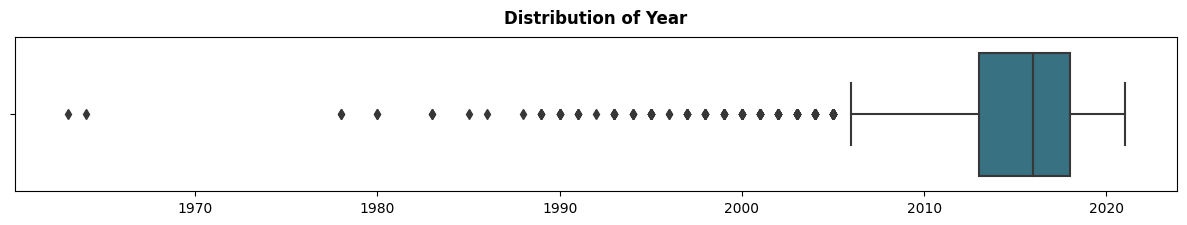

In [6402]:
# menampilkan boxplot untuk kolom Year
plt.figure(figsize = (15, 2))
sns.boxplot(x = df_model[numerical_columns[0]], color = "#2a788e")
plt.title(f"Distribution of {numerical_columns[0]}", fontsize = 12, pad = 10, fontweight = "bold")
plt.xlabel(None)
plt.show()

Berdasarkan boxplot di atas, terlihat adanya sejumlah *outlier* (tahun mobil < 2005) yang cukup signifikan, yaitu mencapai sekitar 4.81% dari keseluruhan *dataset*. Berdasarkan informasi dari sebuah situs web yang membahas mobil antik (dapat ditemukan pada tautan [ini](https://en.wikipedia.org/wiki/Antique_car)), Klub mobil antik Amerika menetapkan bahwa mobil antik adalah mobil yang sudah berusia lebih dari 25 tahun. Mengingat tahun terbaru dalam dataset ini adalah tahun 2022, mobil yang dapat dianggap sebagai mobil antik adalah yang diproduksi sebelum tahun 1997. Oleh karena itu, untuk menjaga konsistensi dengan tujuan Syarah.com sebagai *platform* penjualan mobil komersil, kita mengambil keputusan untuk membatasi rentang tahun produksi mulai dari tahun 1997 hingga tahun terbaru (2022). Meskipun tindakan ini dapat membatasi model dengan menghilangkan sebagian outlier, namun di sisi lain, batasan ini diharapkan dapat meningkatkan efektivitas dan ketepatan sasaran pada model yang akan dibangun.

In [6403]:
print(f"Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom {numerical_columns[0]} {len(df_model)}")
print(f"Jumlah outlier yang akan dihapus: {len(df_model[df_model[numerical_columns[0]] < 1997])}")

Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom Year 3824
Jumlah outlier yang akan dihapus: 50


In [6404]:
df_model = df_model[df_model[numerical_columns[0]] >= 1997]
print(f"Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom {numerical_columns[0]} {len(df_model)}")

Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom Year 3774


**Analisis *outlier* pada kolom `Engine_Size`**

In [6405]:
# menampilkan descriptive statistics pada kolom Engine_Size
df_model[[numerical_columns[1]]].describe()

,Engine_Size
count,3774.000000
mean,3.171516
std,1.456132
min,1.000000
25%,2.000000
50%,2.700000
75%,4.000000
max,9.000000


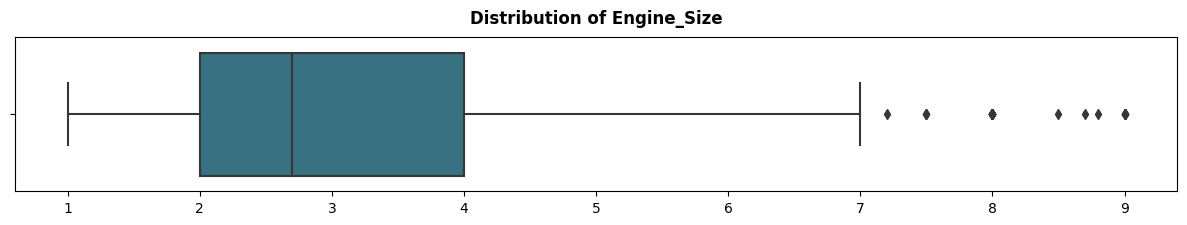

In [6406]:
# menampilkan boxplot untuk kolom Engine_Size
plt.figure(figsize = (15, 2))
sns.boxplot(x = df_model[numerical_columns[1]], color = "#2a788e")
plt.title(f"Distribution of {numerical_columns[1]}", fontsize = 12, pad = 10, fontweight = "bold")
plt.xlabel(None)
plt.show()

Menurut sumber Syarah.com, mayoritas mobil yang di jual memiliki kapasitas mesin < 7 atau 7.000 cc. Pun demikian pada *dataset* menunjukkan *upper fence* `Engine_Size` yaitu 7, sehingga kita memutuskan untuk menggunakan data dengan `Engine_Size` <= 7.

In [6407]:
print(f"Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom {numerical_columns[1]} {len(df_model)}")
print(f"Jumlah outlier yang akan dihapus: {len(df_model[df_model[numerical_columns[1]] > 7])}")

Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom Engine_Size 3774
Jumlah outlier yang akan dihapus: 29


In [6408]:
df_model = df_model[df_model[numerical_columns[1]] <= 7]

In [6409]:
print(f"Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom {numerical_columns[1]} {len(df_model)}")

Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom Engine_Size 3745


**Analisis *outlier* pada kolom `Mileage`**

In [6410]:
# menampilkan descriptive statistics pada kolom Mileage
df_model[[numerical_columns[2]]].describe()

,Mileage
count,3.745000e+03
mean,1.426683e+05
std,3.816531e+05
min,1.000000e+02
25%,4.900000e+04
50%,1.030000e+05
75%,1.820000e+05
max,2.000000e+07


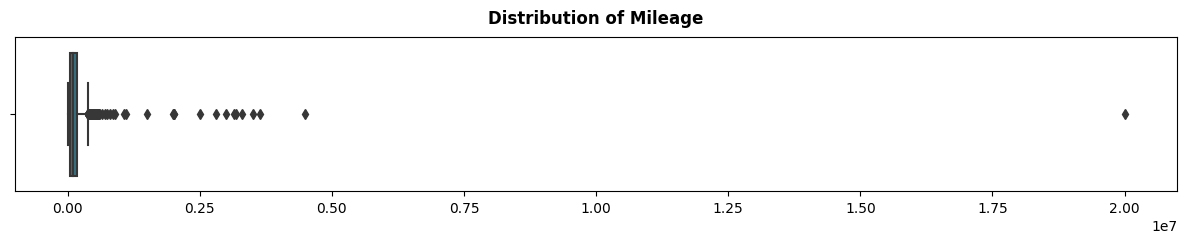

In [6411]:
# menampilkan boxplot untuk kolom Mileage
plt.figure(figsize = (15, 2))
sns.boxplot(x = df_model[numerical_columns[2]], color = "#2a788e")
plt.title(f"Distribution of {numerical_columns[2]}", fontsize = 12, pad = 10, fontweight = "bold")
plt.xlabel(None)
plt.show()

Dari boxplot di atas, dapat dilihat bahwa *upper fence* pada kolom `Mileage` adalah 385.500 km, serta terdapat 131 data dengan jarak tempuh melebihi *upper fence* tersebut. Menurut informasi yang ditemukan pada tautan ini, disarankan untuk mempertimbangkan pembelian mobil yang memiliki jarak tempuh di bawah 200.000 mil atau setara dengan 321.868 km (200.000 mil * 1.609 km/mil). Alasannya adalah karena jarak tempuh mobil memiliki korelasi erat dengan umur suku cadang suatu mobil, yang berarti semakin tinggi jarak tempuhnya, biaya perawatan mobil cenderung meningkat, serta dianggap tidak sebanding jika mobil memiliki jarak tempuh melebihi 200.000 mil. Meskipun demikian, karena dataset menunjukkan bahwa batas atas *upper fence* `Mileage` adalah 385.500 km, maka keputusan diambil untuk menggunakan hanya data yang `Mileage`-nya <= 385.500 km.

In [6412]:
print(f"Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom {numerical_columns[2]} {len(df_model)}")
print(f"Jumlah outlier yang akan dihapus: {len(df_model[df_model[numerical_columns[2]] > 385500])}")

Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom Mileage 3745
Jumlah outlier yang akan dihapus: 126


In [6413]:
df_model = df_model[df_model[numerical_columns[2]] <= 385500]

In [6414]:
print(f"Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom {numerical_columns[2]} {len(df_model)}")

Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom Mileage 3619


**Analisis *outlier* pada kolom `Price`**

In [6415]:
# menampilkan descriptive statistics pada kolom Price
df_model[[numerical_columns[3]]].describe()

,Price
count,3619.000000
mean,79735.753799
std,72807.069333
min,1.000000
25%,37000.000000
50%,60000.000000
75%,95000.000000
max,850000.000000


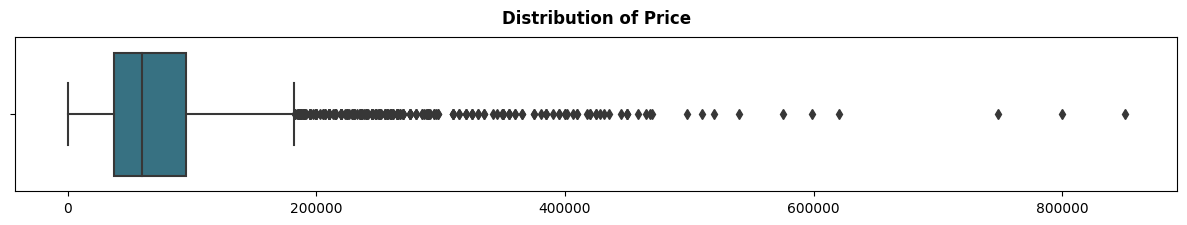

In [6416]:
# menampilkan boxplot untuk kolom Price
plt.figure(figsize = (15, 2))
sns.boxplot(x = df_model[numerical_columns[3]], color = "#2a788e")
plt.title(f"Distribution of {numerical_columns[3]}", fontsize = 12, pad = 10, fontweight = "bold")
plt.xlabel(None)
plt.show()

Berdasarkan boxplot di atas, terdapat *outlier* pada tabel `Price` sebanyak 6.77%. Apabila kita menghapus keseluruhan *outlier*, maka efeknya akan berpengaruh terhadap limitasi model, sehingga sebagai pertimbangan kita akan menggunakan harga mobil yang dipatok oleh *website* Syarah.com. Menurut [tautan](https://syarah.com/en/filters?is_online=1&is_new=0&price_from=10000&sort=price) ini, *range* harga yang dibatasi yaitu dari 10.000 SAR - 710.000 SAR. Namun berdasarkan nilai *upper fence* pada kolom `Price`, terdapat 259 data yang dianggap terlalu besar apabila kita *drop*. Sehingga kita menetapkan range harga 10.000 SAR - 710.000 SAR.

In [6417]:
print(f"Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom {numerical_columns[3]} {len(df_model)}")
print(f"Jumlah outlier yang akan dihapus: {len(df_model[(df_model[numerical_columns[3]] < 10000) | (df_model[numerical_columns[3]] > 710000)])}")

Jumlah keseluruhan data sebelum melewati proses handling outliers pada kolom Price 3619
Jumlah outlier yang akan dihapus: 89


In [6418]:
df_model = df_model[df_model[numerical_columns[3]].between(10000, 710000)]

In [6419]:
print(f"Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom {numerical_columns[3]} {len(df_model)}")

Jumlah keseluruhan data setelah melewati proses handling outliers pada kolom Price 3530


## **DATA ANALYSIS**

### `Categorical Variables vs. Target`

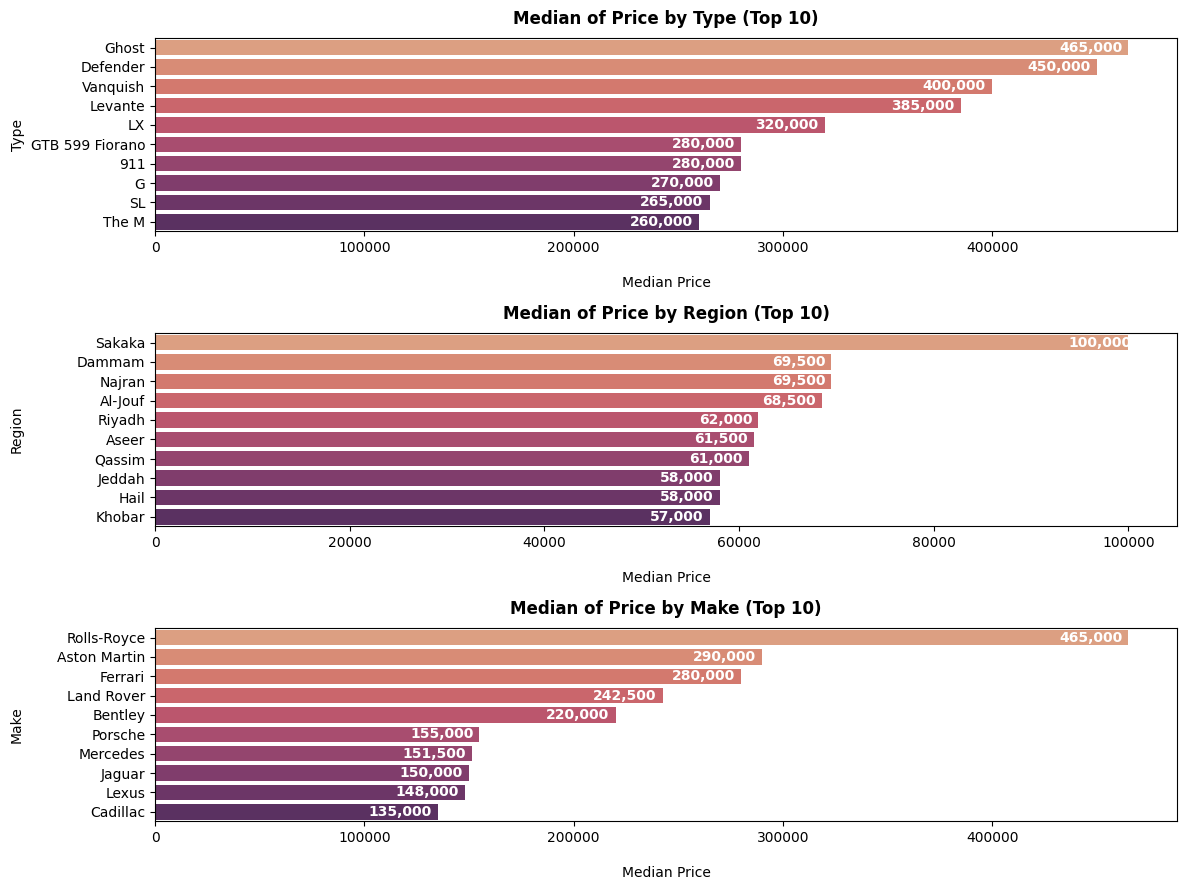

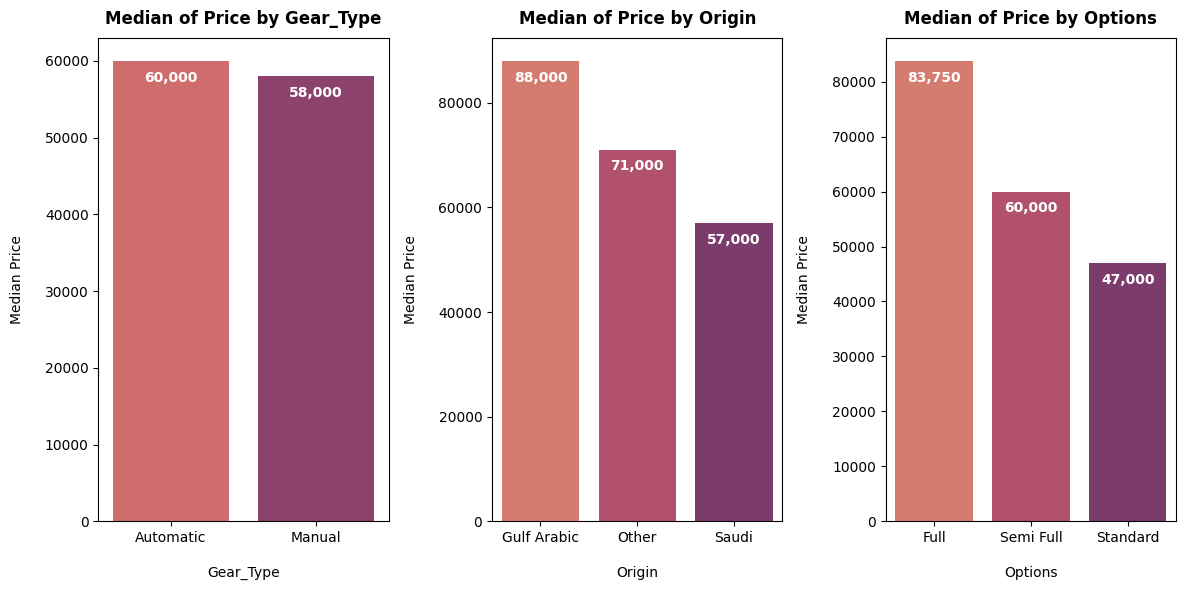

In [6420]:
# menampilkan median target (Price) untuk setiap kolom kategorikal
for plot in range(2):
    if plot == 0:
        fig, ax = plt.subplots(3, 1, figsize = (11.97, 9))
        for i, j in zip(categorical_columns[:3], ax.flatten()):
            ax = sns.barplot(data = df_model, x = "Price", y = i, ax = j, ci = 0, estimator = "median", order = df_model.groupby(i)["Price"].median().sort_values(ascending = False).head(10).index, palette = "flare")
            ax.set_title(f"Median of Price by {i} (Top 10)", fontsize = 12, pad = 10, fontweight = "bold")
            ax.set_xlabel("Median Price", labelpad = 15)
            
            if i == "Region":
                ax.set_ylabel(i, labelpad = 38)
            elif i == "Make":
                ax.set_ylabel(i, labelpad = 23.8)

            container = ax.containers[0]
            ax.bar_label(
                container,
                labels = [f"{x:,.0f}" for x in container.datavalues],
                label_type = "edge",
                padding = -50,
                color = "white",
                fontweight = "bold"
            )
        plt.tight_layout()
        plt.show()
    else:
        fig, ax = plt.subplots(1, 3, figsize = (11.96, 6))
        for i, j in zip(categorical_columns[3:-1], ax.flatten()):
            ax = sns.barplot(data = df_model, x = i, y = "Price", ax = j, ci = 0, estimator = "median", order = df_model.groupby(i)["Price"].median().sort_values(ascending = False).head(10).index, palette = "flare")
            ax.set_title(f"Median of Price by {i}", fontsize = 12, pad = 10, fontweight = "bold")
            ax.set_xlabel(i, labelpad = 15)
            ax.set_ylabel("Median Price", labelpad = 15)
            container = ax.containers[0]
            ax.bar_label(
                container,
                labels = [f"{x:,.0f}" for x in container.datavalues],
                label_type = "edge",
                padding = -17,
                color = "white",
                fontweight = "bold"
            )
        plt.tight_layout()
        plt.show()

Berdasarkan gambar di atas, kita dapat menyimpulkan bahwa:
- Mobil **Ghost** merupakan `Type` mobil yang memiliki nilai median `Price` tertinggi.
- **Sakaka** menjadi `Region` yang menghasilkan nilai median `Price` terbesar.
- *Brand* atau `Make` yang menduduki *top* 10 pada nilai median `Price` merupakan *brand* mobil kelas atas, seperti **Rolls-Royce**, **Aston Martin**, **Ferrari**, **Land Rover**, dsb.
- Penjualan mobil dengan transmisi **Automatic** memiliki nilai median `Price` yang sedikit lebih tinggi dibandingkan dengan transmisi **Manual**.
- Penjualan yang berasal dari **Gulf Arabic** memiliki nilai median `Price` tertinggi dibandingkan dengan **Other** dan **Saudi**.
- Fitur atau `Options` **Full** memiliki nilai median `Price` tertinggi jika dibandingkan dengan `Option` lainnya.

### `Numerical Variables vs. Target`

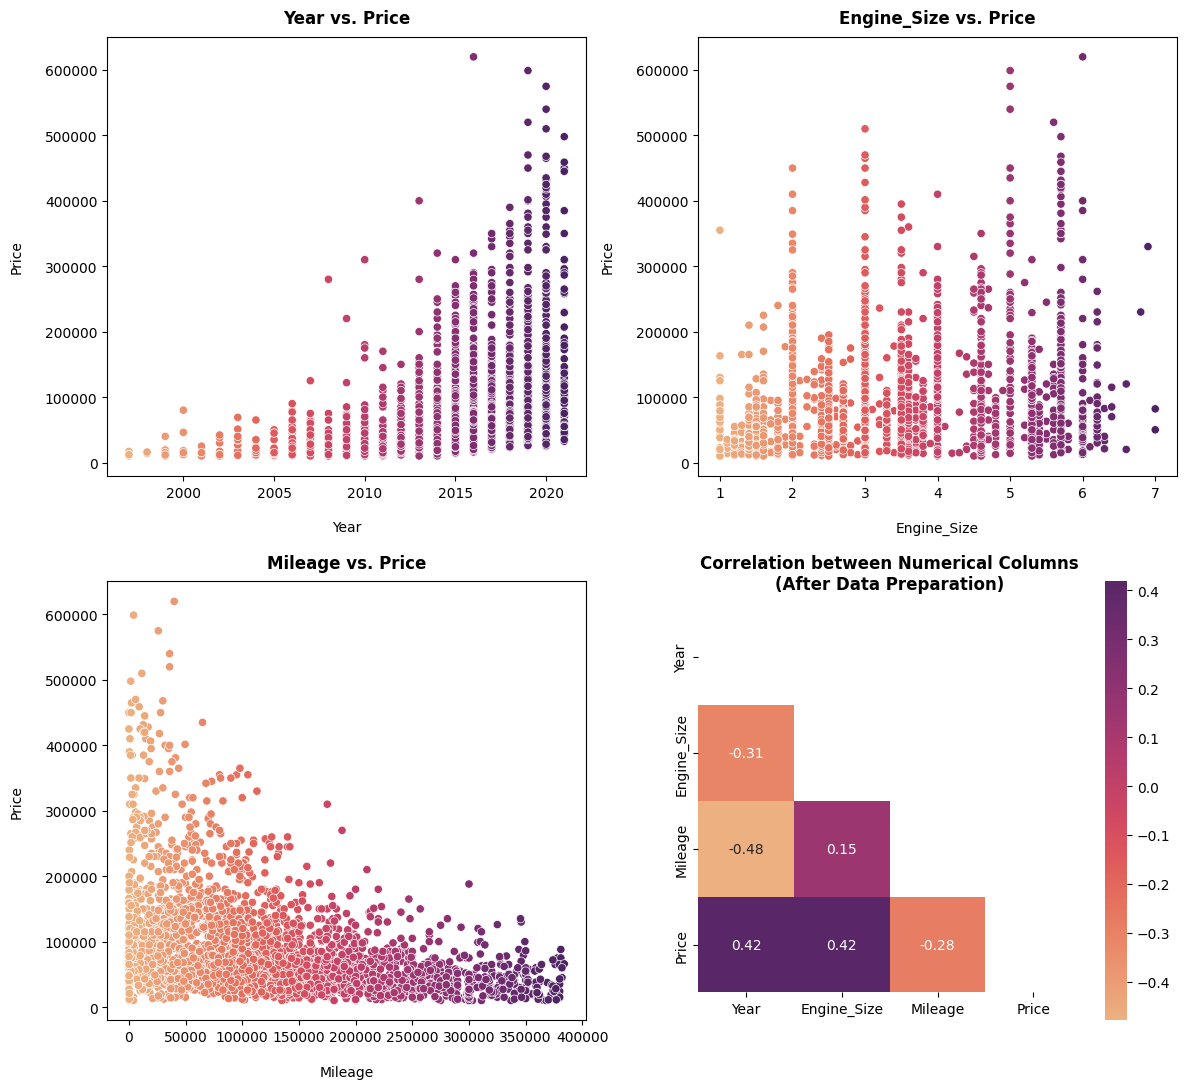

In [6421]:
# memperlihatkan hubungan antara kolom numerikal dengan target (Price) serta mengecek korelasi antar kolom numerikal setelah melalui proses data preparation
plt.figure(figsize= (11.97, 11))
ax = 1
for col in numerical_columns[:-1]:
    plt.subplot(2, 2, ax)
    sns.scatterplot(
        data = df_model,
        x = col,
        y = "Price",
        palette = "flare",
        hue = col,
        legend = None
    )
    plt.title(f"{col} vs. Price", fontsize = 12, pad = 10, fontweight = "bold")
    plt.xlabel(col, labelpad = 15)
    plt.ylabel("Price", labelpad = 15)
    ax += 1

plt.subplot(2, 2, 4)
numerical_correlation = df_model[numerical_columns].corr(method = "spearman")
matrix = np.triu(numerical_correlation)
sns.heatmap(
    data = numerical_correlation,
    annot = True,
    fmt = ".2f",
    cmap = "flare",   
    center = 0,
    mask = matrix,
    square = True
)
plt.title("Correlation between Numerical Columns\n(After Data Preparation)", fontsize = 12, pad = 15, fontweight = "bold")

plt.tight_layout()
plt.show()

Berdasarkan gambar di atas, kita dapat menyimpulkan bahwa:
- Semakin muda `Year` mobil, maka `Price` mobil akan semakin tinggi.
- Pada sebaran data `Engine_Size` tidak memiliki pola terhadap `Price` mobil, namun beberapa sebaran cenderung naik di beberap `Engine_Size`.
- Semakin rendah `Mileage` suatu mobil, maka `Price`-nya akan semakin tinggi. Hal ini sangat berkaitan dengan kualitas/performa mesin yang sudah kita dibahas saat proses *handling outliers* kolom `Mileage`.
- Korelasi antara kolom `Year` dan `Engine_Size` terhadap target (`Price`) memiliki hubungan *positive-moderate* yang sama dengan nilai 0.42.
- Korelasi `Mileage` terhadap `Price` memiliki hubungan *negative-weak* dengan nilai -0.28.

## **MODELING & EVALUATION**

### `Encoding`

Sebelum kita memulai proses *encoding*, kita perlu mengetahui terlebih dahulu informasi terbaru dari *dataset* yang telah dibersihkan dengan menampilkan informasi pentingnya saja.

In [6422]:
# menampilkan keterangan dataset setelah melewati proses data preparation
pd.set_option("display.max_colwidth", 1)
num_rows = df_model.shape[0]
num_columns = df_model.shape[1]

list_item = []
for col in df_model.columns:
    list_item.append([col, df_model[col].dtype, df_model[col].isna().sum(), df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

tabel_unique = pd.DataFrame(columns = ["Data Features", "Data Type", "Null Values", "Number of Unique", "Unique Sample (2)"], data = list_item)
tabel_unique

,Data Features,Data Type,Null Values,Number of Unique,Unique Sample (2)
0,Type,object,0,306,"[Pegas, Other]"
1,Region,object,0,27,"[Jubail, Hail]"
2,Make,object,0,55,"[Other, MG]"
3,Gear_Type,object,0,2,"[Automatic, Manual]"
4,Origin,object,0,3,"[Saudi, Gulf Arabic]"
5,Options,object,0,3,"[Semi Full, Standard]"
6,Year,int64,0,25,"[1997, 2011]"
7,Engine_Size,float64,0,57,"[6.4, 4.5]"
8,Mileage,int64,0,1221,"[285, 34000]"
9,Price,int64,0,386,"[410000, 46500]"


Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah terlebih dahulu menjadi fitur numerikal. Kita dapat menggunakan 'ColumnTransformer' untuk dapat mengubah datanya, yang mana nanti dapat diaplikasikan pada *pipeline* model. Prosedur tersebut akan dilakukan dengan:

1. Merubah kolom `Type` menggunakan BinaryEncoding di karenakan kolom ini tidak memiliki urutan/tidak ordinal serta memiliki jumlah nilai unik yang banyak.
2. Merubah kolom `Region` menggunakan BinaryEncoding di karenakan kolom ini tidak memiliki urutan/tidak ordinal serta memiliki jumlah nilai unik yang banyak.
3. Merubah kolom `Make` menggunakan BinaryEncoding di karenakan kolom ini tidak memiliki urutan/tidak ordinal serta memiliki jumlah nilai unik yang banyak.
4. Merubah kolom `Gear_Type` menggunakan OneHotEncoding di karenakan kolom ini tidak memiliki urutan/tidak ordinal serta memiliki jumlah nilai unik yang hanya sedikit.
5. Merubah kolom `Origin` menggunakan OneHotEncoding di karenakan kolom ini tidak memiliki urutan/tidak ordinal serta memiliki jumlah nilai unik yang hanya sedikit.
6. Merubah kolom `Options` menggunakan OrdinalEncoding di karenakan kolom ini memiliki urutan/ordinal serta memiliki jumlah nilai unik yang hanya sedikit. Maksud urutan di sini yaitu ketika mobil memiliki fitur/spesifikasi yang lengkap atau **Full**, tingkatan mobil akan cenderung lebih tinggi di atas mobil dengan fitur/spesifikasi **Semi Full** dan **Standard**. Begitupun juga dengan mobil yang fitur/spesifikasi-nya **Semi Full**, tingkatannya akan selalu berada di atas mobil dengan fitur/spesifikasi **Standard**.

In [6423]:
# melakukan mapping untuk OrdinalEncoder
ordinal_mapping = [
    {"col" : "Options", "mapping" : {"Standard" : 0, "Semi Full" : 1, "Full" : 2}}
]

In [6424]:
# encoding pada kolom kategorikal
transformer = ColumnTransformer([
    ("OneHot", OneHotEncoder(drop = "first"), ["Gear_Type", "Origin"]),
    ("Ordinal", OrdinalEncoder(cols = ["Options"], mapping = ordinal_mapping), ["Options"]),
    ("Binary", BinaryEncoder(), ["Type", "Region", "Make"])
], remainder = "passthrough")

### `Define Scaler`

Mengingat dalam pembuatan model *machine learning* nantinya kita juga akan mencoba menggunakan algoritma seperti Logistic Regression dan K-Nearest Neighbors, maka kita harus menerapkan *scaling*. Harapannya dengan memiliki fitur pada skala yang sama, maka kinerja algoritma *machine learning* akan meningkat di karenakan setiap fitur dapat berkontribusi sama terhadap target. Jika tidak dilakukan *scaling*, maka variabel yang berskala besar akan mendominasi fitur berskala kecil, khususnya untuk algoritma yang memperhitungkan jarak seperti K-Nearest Neighbors. Kemudian, karena distribusi data dari fitur numerikal mengandung banyak *outlier*, maka kita akan memakai 'RobustScaler'. Namun ketika salah satu algoritma telah terpilih, nantinya kita akan tetap melakukan pemilihan *scaler* terbaik pada tahap *hyperparameter tuning* (Catatan: Scaler hanya akan digunakan pada algorima yang tidak berbasis Decision Tree serta algoritma Decision Tree itu sendiri).

In [6425]:
# menentukan scaler
scaler = RobustScaler()

### `Define Features (X) and Target(y)`

Sebelum memulai pemodelan, kita akan mendefinisikan *features* serta *target*-nya terlebih dahulu:
- *features* : `Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size,` dan `Mileage`.
- *target* : `Price`

In [6426]:
# menentukan feature dan target/label
X = df_model.drop(columns = "Price")
y = df_model["Price"]

### `Data Splitting`

Untuk pemodelan ini kita akan menggunakan 'test_size = 0.15' yang berarti proporsi *data testing*-nya adalah 15% dari keseluruhan *dataset*, sementara proporsi *data training*-nya adalah 85% dari keseluruhan *dataset*.

In [6427]:
# splitting data training dan test dengan proporsi 85:15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### `Model Benchmarking - Default Hyperparameter & Cross Validation`

*Benchmark* pemodelan akan dilakukan dengan menggunakan 9 algoritma yang di antaranya yaitu:
- Linear Regression
- K-Nearest Neighbors Regressor
- Decision Tree Regressor
- Random Forest Regressor
- AdaBoost Regressor
- XGBoost Regressor
- LightGBM Regressor
- GradientBoost Regressor
- CatBoost Regressor

Dari ke 9 algoritma di atas, nantinya kita hanya akan memilih 1 algoritma terbaik dari hasil *benchmarking*.

In [6428]:
# menentukan algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state = 0)
rf = RandomForestRegressor(random_state = 0)
ab = AdaBoostRegressor(random_state = 0)
xgb = XGBRegressor(random_state = 0)
lgbm = LGBMRegressor(random_state = 0, verbose = -1)
gb = GradientBoostingRegressor(random_state = 0)
cb = CatBoostRegressor(random_state = 0, verbose = False)

# pemodelan akan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func = np.log, inverse_func = np.exp)
log_knn = TransformedTargetRegressor(knn, func = np.log, inverse_func = np.exp)
log_dt = TransformedTargetRegressor(dt, func = np.log, inverse_func = np.exp)
log_rf = TransformedTargetRegressor(rf, func = np.log, inverse_func = np.exp)
log_ab = TransformedTargetRegressor(ab, func = np.log, inverse_func = np.exp)
log_xgb = TransformedTargetRegressor(xgb, func = np.log, inverse_func = np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func = np.log, inverse_func = np.exp)
log_gb = TransformedTargetRegressor(gb, func = np.log, inverse_func = np.exp)
log_cb = TransformedTargetRegressor(cb, func = np.log, inverse_func = np.exp)

Untuk menentukan model terbaik mana yang akan dipakai, kita akan melakukan *cross validation*, kemudian nantinya akan memilih 3 algoritma dengan *scoring* terbaik untuk di *predict* ke *test set* untuk melihat apakah hasil masih konsisten atau ada perubahan. Pada kolom `Price`, dapat dilihat harganya memilki rentang yang sangat jauh. Sebagai gambaran, *range* harga mobil bekas adalah 10.000 SAR - 710.000 SAR yang artinya ratio nilai maks/min adalah 70x, sehingga jika kita tetap menggunakan skala **standard**, tentu saja model akan kesulitan untuk memprediksi dengan akurat mengingat rentang variansi nilai yang terlalu besar. Oleh karena itu, kita putuskan untuk menggunakan skala **logaritmik** yang nantinya akan di-*inverse* agar dapat diinterpretasikan.

In [6429]:
# benchmarking pada 11 algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_ab, log_xgb, log_lgbm, log_gb, log_cb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for model in models:
    
    # cross validation
    crossval = KFold(n_splits = 5)

    # pipeline untuk algoritma yang tidak berbasis Decision Tree
    pipe_model1 = Pipeline([
        ("preprocessing", transformer),
        ("scaler", scaler),
        ("modeling", model)
    ])

    # pipeline untuk algoritma yang berbasis Decision Tree
    pipe_model2 = Pipeline([
        ("preprocessing", transformer),
        ("model", model)
    ])

    if model in [log_lr, log_knn]:
        estimator = pipe_model1
    else:
        estimator = pipe_model2

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = "neg_root_mean_squared_error", 
        error_score = "raise"
    )
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = "neg_mean_absolute_error", 
        error_score = "raise"
    )
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = "neg_mean_absolute_percentage_error", 
        error_score = "raise"
    )
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [6430]:
# evaluasi hasil dari benchmarking setiap algoritma
pd.DataFrame({
    "Model" : [
        "Linear Regression",
        "K-Nearest Neighbors Regressor",
        "Decision Tree Regressor",
        "Random Forest Regressor",
        "AdaBoost Regressor",
        "XGBoost Regressor",
        "LightGBM Regressor",
        "GradientBoost Regressor",
        "CatBoost Regressor"
    ],
    "Mean_RMSE" : nilai_mean_rmse,
    "Std_RMSE" : nilai_std_rmse,
    "Mean_MAE" : nilai_mean_mae,
    "Std_MAE" : nilai_std_mae,
    "Mean_MAPE" : nilai_mean_mape,
    "Std_MAPE" : nilai_std_mape
}).sort_values("Mean_MAPE", ascending = False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
8,CatBoost Regressor,-27471.719744,2347.956128,-13764.399088,974.834731,-0.179826,0.007901
6,LightGBM Regressor,-30853.954765,2256.266477,-16010.831289,873.108207,-0.204367,0.007431
5,XGBoost Regressor,-31359.194730,2742.961829,-16342.886412,1280.083585,-0.214485,0.012280
3,Random Forest Regressor,-34567.761240,2610.480509,-17497.725251,858.967430,-0.228700,0.007964
7,GradientBoost Regressor,-37758.123981,3311.193264,-20533.008871,1482.644414,-0.250930,0.014389
1,K-Nearest Neighbors Regressor,-34844.124709,3591.155988,-18336.341622,931.040325,-0.267634,0.016536
0,Linear Regression,-46228.642663,3199.692451,-25673.877277,1242.376123,-0.322956,0.011124
2,Decision Tree Regressor,-45824.767395,2978.402481,-24119.001137,1253.194807,-0.338910,0.020383
4,AdaBoost Regressor,-47682.038060,4564.655103,-28322.801740,1497.623568,-0.387615,0.007165


Dari sini terlihat bahwa 3 model terbaik adalah **CatBoost Regressor**, **LightGBM Regressor**, dan **XGBoost Regressor**, dimana ketiga model tersebut ditransformasikan ke skala **logaritmik** dan kemudian diinvere kembali untuk dapat diinterpretasikan. Adapun ketiga model yang menghasilkan nilai **MAPE** yang cukup berdekatan dibandingkan model lainnya, yaitu 17,9 % untuk **CatBoost Regressor**, 20.4% untuk **LightGBM Regressor**, dan 21,4% untuk **XGBoost Regressor**. Sebelum memutuskan model terbaik, ada baiknya dilakukan validasi sekali lagi pada ketiga model tersebut dengan melakukan *predict* terhadap *test set*. Apabila tidak ada perubahan dalam urutannya, akan digunakan model **CatBoost Regressor** sebagai *benchmark* model terbaik yang kemudian akan diimplementasikan *hyperparameter tuning* untuk mendapatkan hasil terbaik dari model tersebut.

### `Predict to Test Set`

In [6431]:
# predict pada test set
models = {
    "CatBoost Regressor" : log_cb,
    "LightGBM Regressor" : log_lgbm,
    "XGBoost Regressor" : log_xgb
}

score_rmse = []
score_mae = []
score_mape = []

for model in models:
    pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("model", models[model])
    ])

    pipe_model.fit(X_train, y_train)
    y_pred = pipe_model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [6455]:
score_before_tuning = pd.DataFrame({
    "RMSE": score_rmse,
    "MAE": score_mae,
    "MAPE": score_mape
}, index = models.keys())

score_before_tuning.sort_values("MAPE")

,RMSE,MAE,MAPE
CatBoost Regressor,26550.219872,13741.798407,0.174028
XGBoost Regressor,29811.718235,15892.221962,0.202628
LightGBM Regressor,30754.166840,16245.091395,0.204397


Ketika dilakukan prediksi pada *test set*, performa algoritma **CatBoost Regressor** secara akumulatif jauh lebih baik dibandingkan dengan **XGBoost Regressor** dan **LightGBM Regressor**. Hal ini dapat dilihat dari nilai RMSE, MAE, dan MAPE yang lebih rendah dari keduanya. Maka dari itu, kita putuskan **CatBoost Regressor** untuk dilakukan *hyperparameter tuning*.

### `Hyperparameter Tuning`

In [6433]:
# Learning rate
learning_rate = list(np.arange(0.01, 0.2, 0.01))

# Depth
depth = list(range(4, 11))

# Number of iterations
iterations = list(range(100, 501, 100))

# Row subsample
subsample = list(np.arange(0.5, 1.1, 0.1))

# Regularization parameter
l2_leaf_reg = list(range(1, 8))

# Minimum child samples
min_child_samples = list(range(1, 21, 5))

# Border count
border_count = list(range(32, 257, 32))

# Relative sample size per tree
rsm = list(np.arange(0.8, 1.1, 0.1))

# Early stopping rounds
early_stopping_rounds = list(range(10, 31, 10))

# Hyperparameter space CatBoost
hyperparam_space_catboost = {
    'model__regressor__learning_rate': learning_rate,
    'model__regressor__depth': depth,
    'model__regressor__iterations': iterations,
    'model__regressor__subsample': subsample,
    'model__regressor__l2_leaf_reg': l2_leaf_reg,
    'model__regressor__min_child_samples': min_child_samples,
    'model__regressor__border_count': border_count,
    'model__regressor__rsm': rsm,
    'model__regressor__early_stopping_rounds': early_stopping_rounds
}

In [6434]:
# Membuat algorithm chains
estimator_log_cb = Pipeline([
        ('preprocessing', transformer),
        ('model', log_cb),
])

# Hyperparameter tuning
random_cb = RandomizedSearchCV(
    estimator_log_cb, 
    param_distributions = hyperparam_space_catboost,
    n_iter = 100,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0  
)

In [6435]:
# Fitting data training untuk mencari parameter terbaik
random_cb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['Options'],
                                                                                              mapping=[{'col': 'Options',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': Standard     0
Semi Fu...
                                        'model__regressor__min_child_samples': [1,
                                                                                6,
                                                                                11,
                                                                                16],
                                        'model__regressor__rsm': [0.8, 0.9, 1.0,
                                                                  1.1],
                                        'model__regressor__subsample': [0.5,
                                                                        0.6,
                                                                        0.7,
                                                                        0.7999999999999999,
                                                                        0.8999999999999999,
                                                                        0.9999999999999999,
                                                                        1.0999999999999999]},
                   random_state=0, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [6436]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_cb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__subsample,param_model__regressor__rsm,param_model__regressor__min_child_samples,param_model__regressor__learning_rate,param_model__regressor__l2_leaf_reg,param_model__regressor__iterations,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
29,0.891172,0.104453,0.024546,0.008915,0.5,1.0,1,0.18,3,500,...,820.248621,13,-0.190722,-0.176798,-0.175624,-0.181366,-0.186866,-0.182275,0.005788,10
63,1.172053,0.327066,0.022081,0.013469,0.8,1.0,1,0.17,4,400,...,790.484213,4,-0.189021,-0.172280,-0.175457,-0.180901,-0.188508,-0.181233,0.006741,6
43,1.471157,0.113172,0.020288,0.008036,0.6,1.0,1,0.12,1,400,...,1011.466147,11,-0.193732,-0.170475,-0.172285,-0.181808,-0.185361,-0.180732,0.008581,3
52,2.972218,0.241168,0.029125,0.004135,0.7,0.8,1,0.11,5,500,...,862.919836,1,-0.185234,-0.167580,-0.175827,-0.178259,-0.181387,-0.177657,0.005943,1
49,1.213950,0.066106,0.050463,0.030016,0.9,0.9,1,0.19,4,500,...,1004.562791,19,-0.193563,-0.170073,-0.174071,-0.191311,-0.186784,-0.183160,0.009399,14


In [6437]:
# Cek skor dan params terbaik
print('CatBoost')
print('Best_score:', random_cb.best_score_)
print('Best_params:', random_cb.best_params_)

CatBoost
Best_score: -0.1776574795034364
Best_params: {'model__regressor__subsample': 0.7, 'model__regressor__rsm': 0.8, 'model__regressor__min_child_samples': 1, 'model__regressor__learning_rate': 0.11, 'model__regressor__l2_leaf_reg': 5, 'model__regressor__iterations': 500, 'model__regressor__early_stopping_rounds': 30, 'model__regressor__depth': 7, 'model__regressor__border_count': 192}


### `Predict to Test Set with Tuned Model`

In [6438]:
# Model XGBoost
model = {'CatBoost Regressor': log_cb}

# Define model terhadap estimator terbaik
cb_tuning = random_cb.best_estimator_

# Fitting model
cb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_cb_tuning = cb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_cb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_cb_tuning))
mae_cb_tuning = mean_absolute_error(y_test, y_pred_cb_tuning)
mape_cb_tuning = mean_absolute_percentage_error(y_test, y_pred_cb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_cb_tuning, 'MAE': mae_cb_tuning, 'MAPE': mape_cb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
CatBoost Regressor,26200.809828,13240.959507,0.167988


### `Performance Comparison`

Perbandingan performa **CatBoost Regressor** sebelum dan sesudah dilakukan **hyperparameter tuning**.

In [6439]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['CatBoost Regressor']).T

,RMSE,MAE,MAPE
CatBoost Regressor,26550.219872,13741.798407,0.174028


In [6440]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
CatBoost Regressor,26200.809828,13240.959507,0.167988


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 26550, 13741, 0.174
- RMSE, MAE & MAPE setelah tuning: 26200, 13240, 0.167

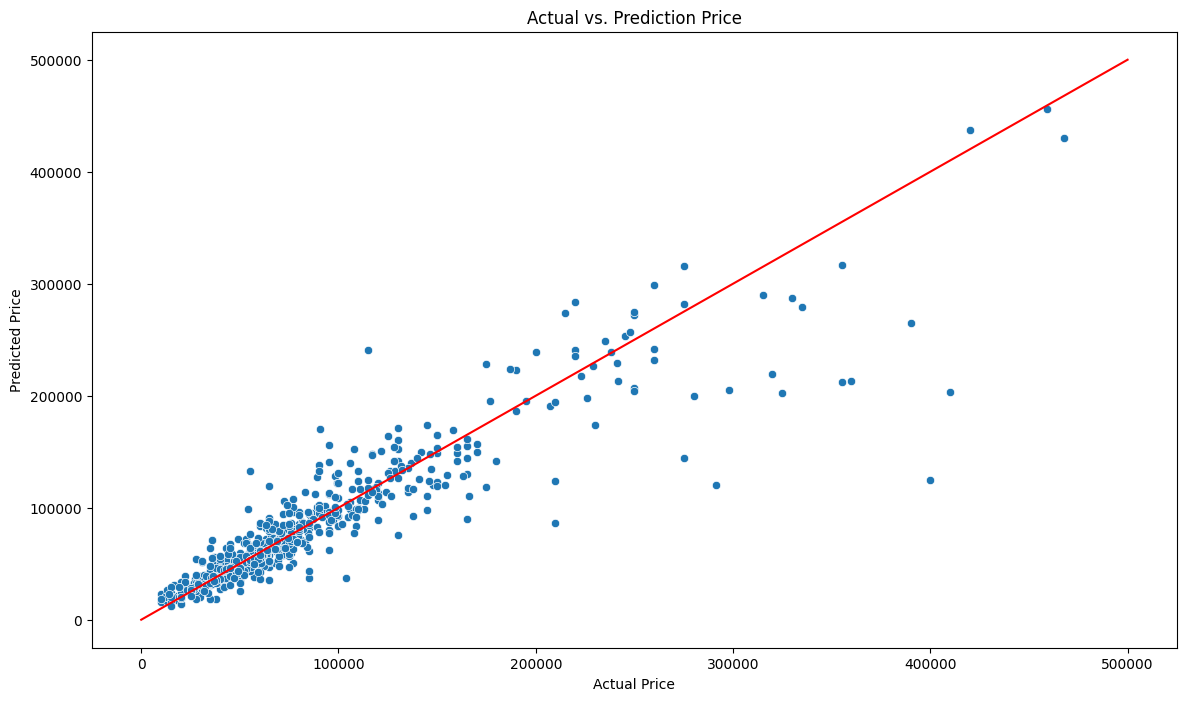

In [6453]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_cb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')
sns.lineplot(x=range(0,500001), y=range(0,500001), color='red')
plt.show()

Dari grafik tersebut, dapat dilihat bahwa harga aktual dan harga yang diprediksi memiliki hubungan positif. Artinya, semakin tinggi harga aktual, semakin tinggi pula harga yang diprediksi. Namun, hubungan tersebut tidak linier sempurna. Ada beberapa titik yang berada di luar garis tren. Hal ini menunjukkan bahwa ada beberapa produk yang harganya tidak sesuai dengan prediksi, dengan estimasi rata-rata error diangka sekitar 16.7%. Namun secara keseluruhan, grafik ini menunjukkan bahwa model prediksi yang digunakan dapat memberikan prediksi yang cukup akurat.

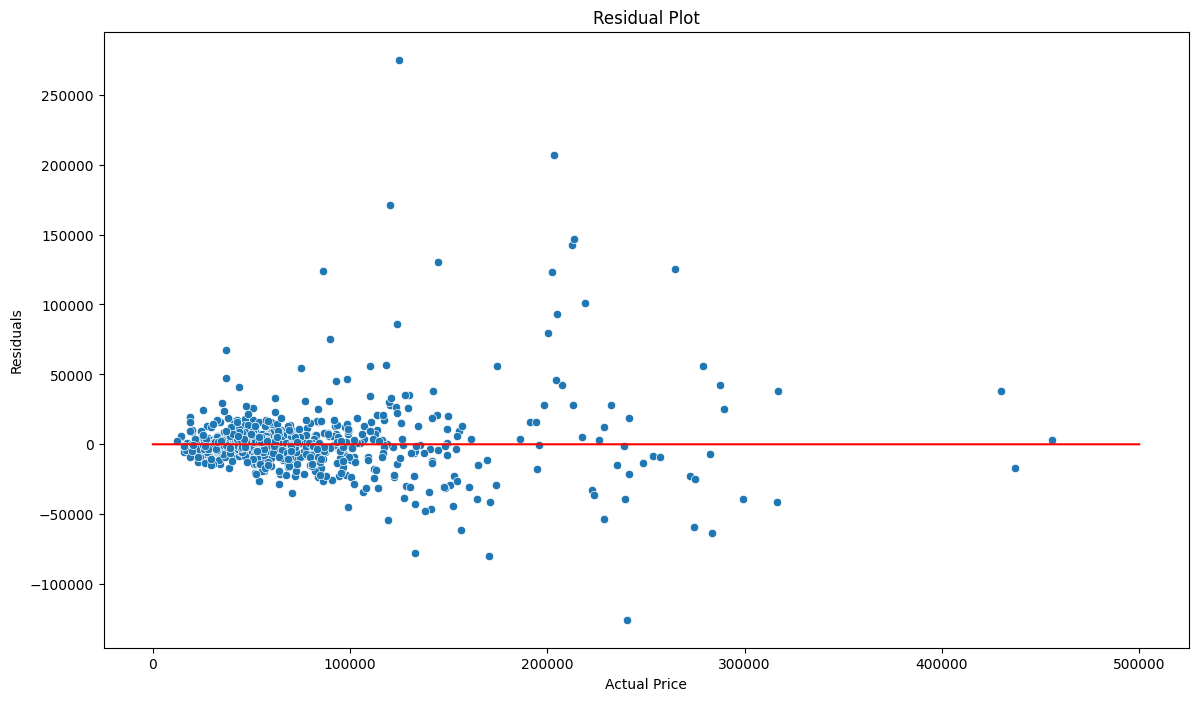

In [6454]:
residuals = y_test - y_pred_cb_tuning

plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_pred_cb_tuning, y=residuals)
sns.lineplot(x= range(0, 500001), y= 0, color= 'red')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

### `Features Importance`

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi `Price` (target), kita dapat mengeceknya melalui function feature_importances_.

In [6457]:
fi = pd.DataFrame({
            'Feature' : transformer.get_feature_names_out(),
            'Importance' : cb_tuning['model'].regressor_.feature_importances_
            }).sort_values(by = 'Importance', ascending = False).head(5)
fi

,Feature,Importance
24,remainder__Year,25.217561
25,remainder__Engine_Size,23.815062
26,remainder__Mileage,7.680109
3,Ordinal__Options,6.858295
23,Binary__Make_5,5.787672


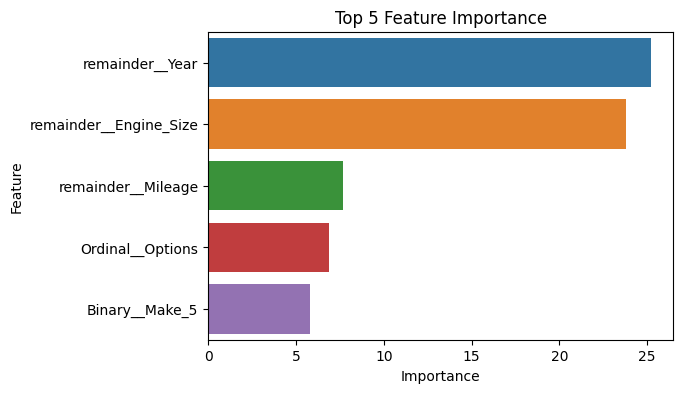

In [6458]:
# plot f
plt.figure(figsize=(6,4))
sns.barplot(data=fi,x='Importance', y='Feature')
plt.title('Top 5 Feature Importance')
plt.show()

## **CONCLUSION & RECOMMENDATION**

### `Kesimpulan`

- Model yang terpilih untuk memprediksi yaitu CatBoost Regressor
- Setelah model dipredict ke test set lalu dilakukan Hyperparameter Tuning, Model CatBoost Regressor mengalami kenaikan performa berdasarkan nilai MAPE sebesar 0.7% (before: 17.4%, after: 16.7%)
- Berdasarkan nilai MAPE atau estimasi rata-rata error diangka sekitar 16.7%, menjadikan model CatBoost Regressor ini dapat dikatakan memiliki kemampuan memprediksi dengan baik
- 5 Feature important pada model ini yaitu Year, Engine Size, Mileage, Ordinal_Option, Make_5

### `Rekomendasi`

### `Save Model`

In [6451]:
# # menyimpan model terbaik

# # best model
# final_model = random_cb.best_estimator_

# # fitting model ke seluruh dataset
# final_model.fit(X, y)

# # save
# pickle.dump(final_model, open("model_gradboost_for_saudi_arabia_used_cars_price_prediction.sav", "wb"))

In [6452]:
# # load model
# model_loaded_pickle = pickle.load(open("model_gradboost_for_saudi_arabia_used_cars_price_prediction.sav", "rb"))